# Projet 5 - Produisez une étude de marché

## Partie I - Importation des données

### Importation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import P5_03_OCR5 as OCR

from scipy.cluster.hierarchy import linkage, fcluster, cophenet, dendrogram

from sklearn import preprocessing
from sklearn import decomposition

from scipy.spatial.distance import pdist

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

### Nettoyer des données

In [3]:
df_data_raw = pd.read_csv('./Data/data_raw.csv',encoding = "ISO-8859-1")

Nous enlevons les données concernants une ensemble de pays (Code Zone supérieur à 5000)

In [4]:
df_data = df_data_raw[~(df_data_raw['Code zone'] >= 5000)]

Nous enlevons la Chine qui corresponds à un autre ensemble de pays (Code Zone : 351)

In [5]:
df_data = df_data[~(df_data['Code zone'] == 351)]

### Préparation du tableau

In [6]:
codeElementAGarder = [511, 664, 674]
codeProduitAGarder = [2501, 2901, 2941]

In [7]:
df_data_cleaned = df_data.copy()

In [8]:
df_data_cleaned = df_data[df_data['Code Produit'].isin(codeProduitAGarder)]
df_data_cleaned = df_data_cleaned[df_data_cleaned['Code Élément'].isin(codeElementAGarder)]

In [9]:
df_data_cleaned['Difference de population'] = df_data_cleaned['Y2017'] / df_data_cleaned['Y2014'] * 100

In [10]:
colonne = ['Zone', 'Y2017']
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2901, 664, 'Disponibilité alimentaire Kcal', colonne])
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2901, 674, 'Disponibilité alimentaire Protéine', colonne])
df_data_cleaned = OCR.ligneToColonne(df_data_cleaned, [2941, 674, 'Proportion Protéine Animale', colonne])

In [11]:
df_data_cleaned['Proportion Protéine Animale'] /= df_data_cleaned['Disponibilité alimentaire Protéine']

In [12]:
filt = df_data_cleaned['Code Élément'] == 511
colonne = ['Zone', 'Difference de population', 'Disponibilité alimentaire Kcal', 'Disponibilité alimentaire Protéine', 'Proportion Protéine Animale']
df_data_cleaned = df_data_cleaned.loc[filt, colonne]

In [13]:
df_data_cleaned

,Zone,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale
0,Afghanistan,108.766110,2000.0,54.09,0.195045
5,Afrique du Sud,104.520316,2994.0,83.41,0.414339
10,Albanie,99.581190,3400.0,119.55,0.554914
15,Algérie,106.334189,3349.0,92.91,0.276719
20,Allemagne,101.483148,3556.0,104.20,0.605374
...,...,...,...,...,...
835,Venezuela (République bolivarienne du),97.868087,2247.0,56.28,0.450782
840,Viet Nam,103.147616,2938.0,90.03,0.408864
845,Yémen,107.788761,2063.0,53.23,0.200263
850,Zambie,109.440453,2013.0,59.09,0.197834


## Partie II - Réalisation du dendrogramme

### Importation des données nettoyés

In [14]:
data = pd.read_csv('./Export/data.csv', index_col = 0)

In [15]:
data

,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale
Zone,,,,
Afghanistan,8.059596,2000.0,54.09,0.195045
Afrique du Sud,4.324821,2994.0,83.41,0.414339
Albanie,-0.420572,3400.0,119.55,0.554914
Algérie,5.956869,3349.0,92.91,0.276719
Allemagne,1.461473,3556.0,104.20,0.605374
...,...,...,...,...
Venezuela (République bolivarienne du),-2.178354,2247.0,56.28,0.450782
Viet Nam,3.051565,2938.0,90.03,0.408864
Yémen,7.225949,2063.0,53.23,0.200263


### Préparation des données - Centrage et Réduction

In [16]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Optimisation du dendrogramme

### Cophenetic correlation

Nous calculons les coefficients Cophenitiques pour chaque méthode de la fonction sklearn.linkage

In [17]:
OCR.coefCophenetic(X_scaled)

,Single,Complete,Average,Weighted,Centroid,Median,Ward
Cophenetic Coefficient,0.33,0.57,0.69,0.58,0.7,0.55,0.67


Nous constatons que la méthode Centroid à la meilleure corélation entre les distances du DataFrame et les distances du dendrogramme.

### Courbe de Lorenz et coefficient de Gini

Nous calculons les coefficients de Gini pour chaque méthode de la fonction sklearn.linkage

In [18]:
OCR.coefGini(X_scaled)

,Single,Complete,Average,Weighted,Centroid,Median,Ward
Gini Coefficient,0.216036,0.420648,0.3456,0.351943,0.320786,0.325397,0.537566


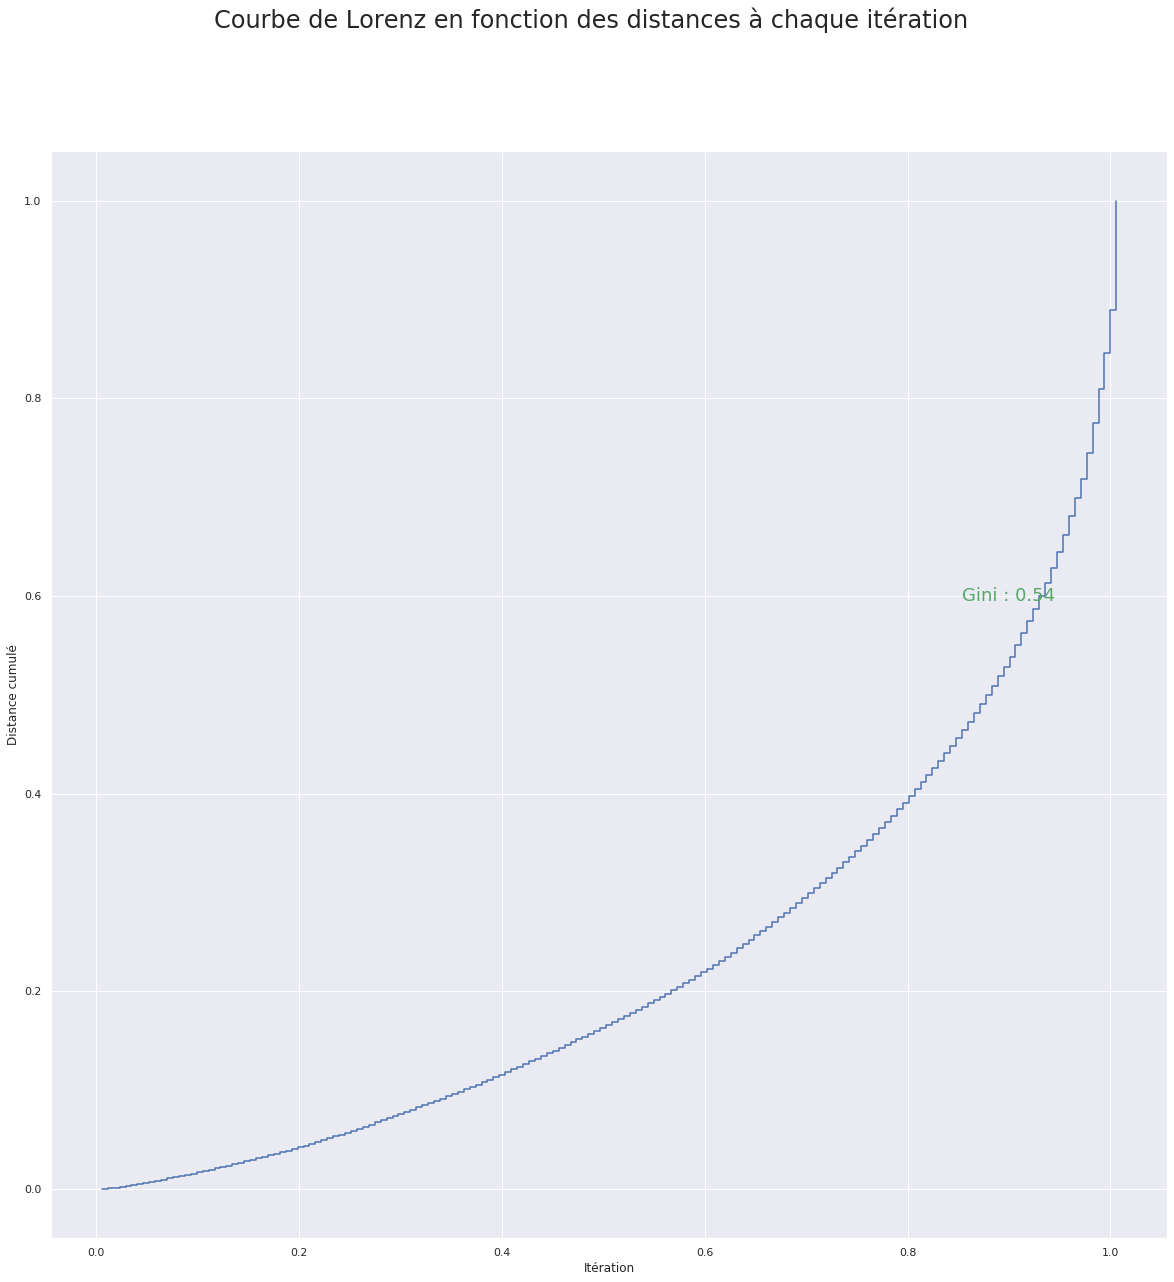

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

Z = linkage(X_scaled, 'ward')
lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.9, 0.6, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

### Coefficient de Silhouette

In [20]:
methods = ['Single', 'Complete', 'Average', 'Weighted', 'Centroid', 'Median', 'Ward']
scoreSilhouetteMethod = []

for method in methods:
    Z = linkage(X_scaled, method.lower())
    scoreSilhouette = []
    for cluster in range(2,11):
        clusters = fcluster(Z, cluster, criterion='maxclust')
        if len(set(clusters)) > 1:
            scoreSilhouette.append(silhouette_score(X_scaled, clusters))
        else:
            scoreSilhouette.append(0)
    
    scoreSilhouetteMethod.append(scoreSilhouette)

silhouette = pd.DataFrame(scoreSilhouetteMethod, index=methods, columns=range(2,11))

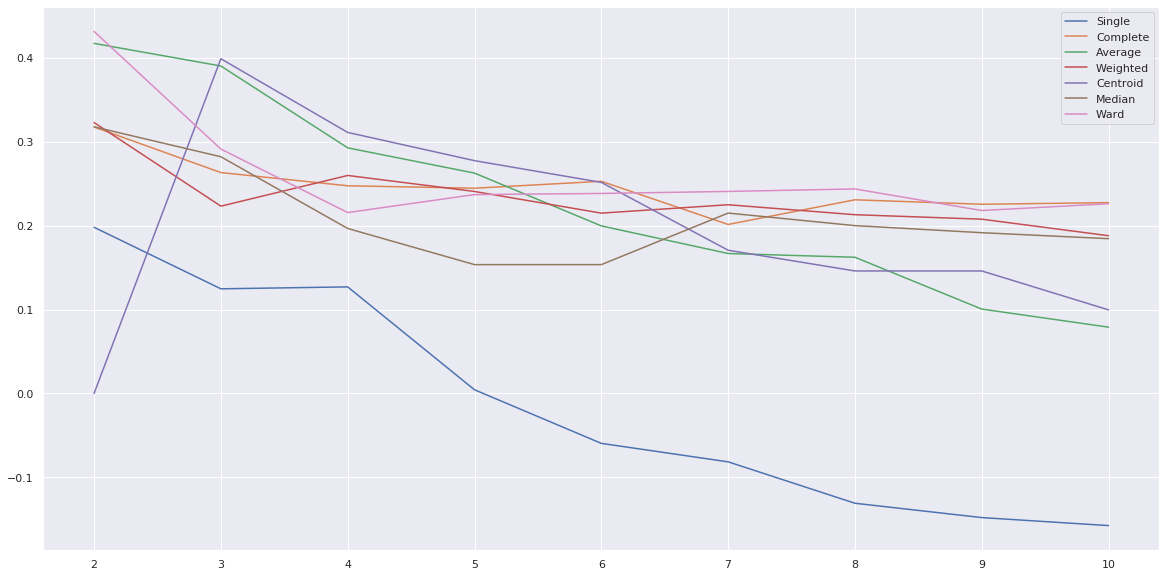

In [21]:
fig = plt.figure(figsize=(20,10))

for i in range(0,7):
    sns.lineplot(y=silhouette.iloc[i, :].values, x=silhouette.iloc[i, :].index, label=methods[i])

In [22]:
silhouette

,2,3,4,5,6,7,8,9,10
Single,0.197957,0.124644,0.126938,0.004341,-0.059511,-0.081512,-0.130853,-0.147936,-0.157472
Complete,0.317448,0.263140,0.247429,0.244513,0.252764,0.201339,0.230718,0.225390,0.227323
Average,0.417048,0.390138,0.292615,0.262507,0.199610,0.166721,0.162243,0.100506,0.078947
Weighted,0.322725,0.223139,0.259714,0.240643,0.214820,0.224826,0.212937,0.207615,0.187904
Centroid,0.000000,0.398764,0.310991,0.277348,0.251461,0.170602,0.145922,0.145922,0.099558
Median,0.317659,0.281994,0.196538,0.153476,0.153476,0.214899,0.199925,0.191505,0.184365
Ward,0.431345,0.291186,0.215504,0.236917,0.238267,0.240679,0.243635,0.217935,0.226006


Nous constatons que les données, au delà de 2 clusters, commence à presenter une superposition des clusters de plus en plus importantes. Pour la méthode centroide, nous obtenons un meilleur résultat pour 3 clusters uniquement du fait que pour la division en deux clusters, un seul cluster est selectionné.

## Partie III - Analyse exploratoire

Nous allons faire une analyse exploratoire des 4 variables en fonction des 5 clusters sélectionnés afin de determiner et d'analyser les caractéristiques de selection des clusters

In [23]:
Z = linkage(X_scaled, 'ward')
clusters = fcluster(Z, 5, criterion='maxclust')

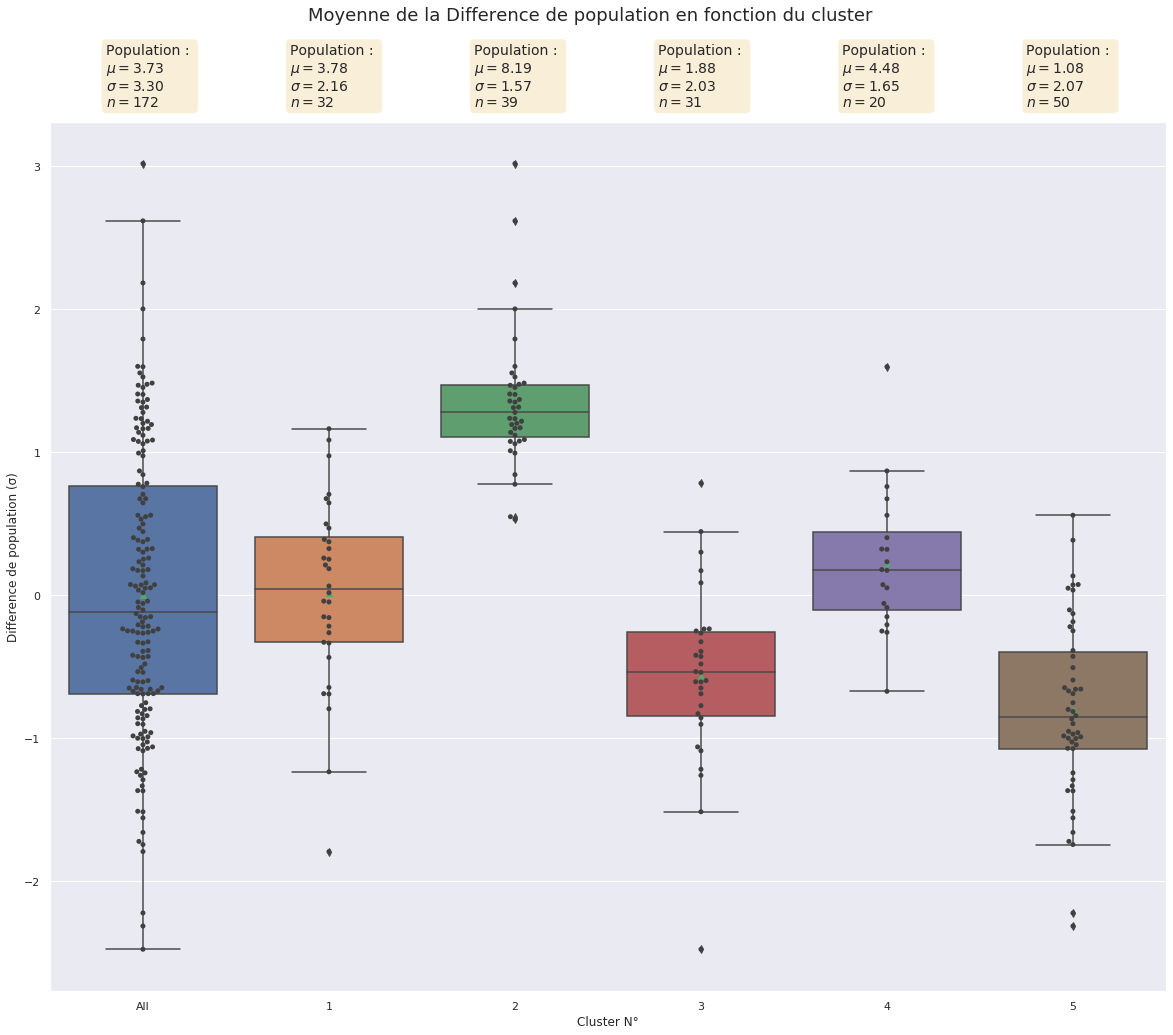

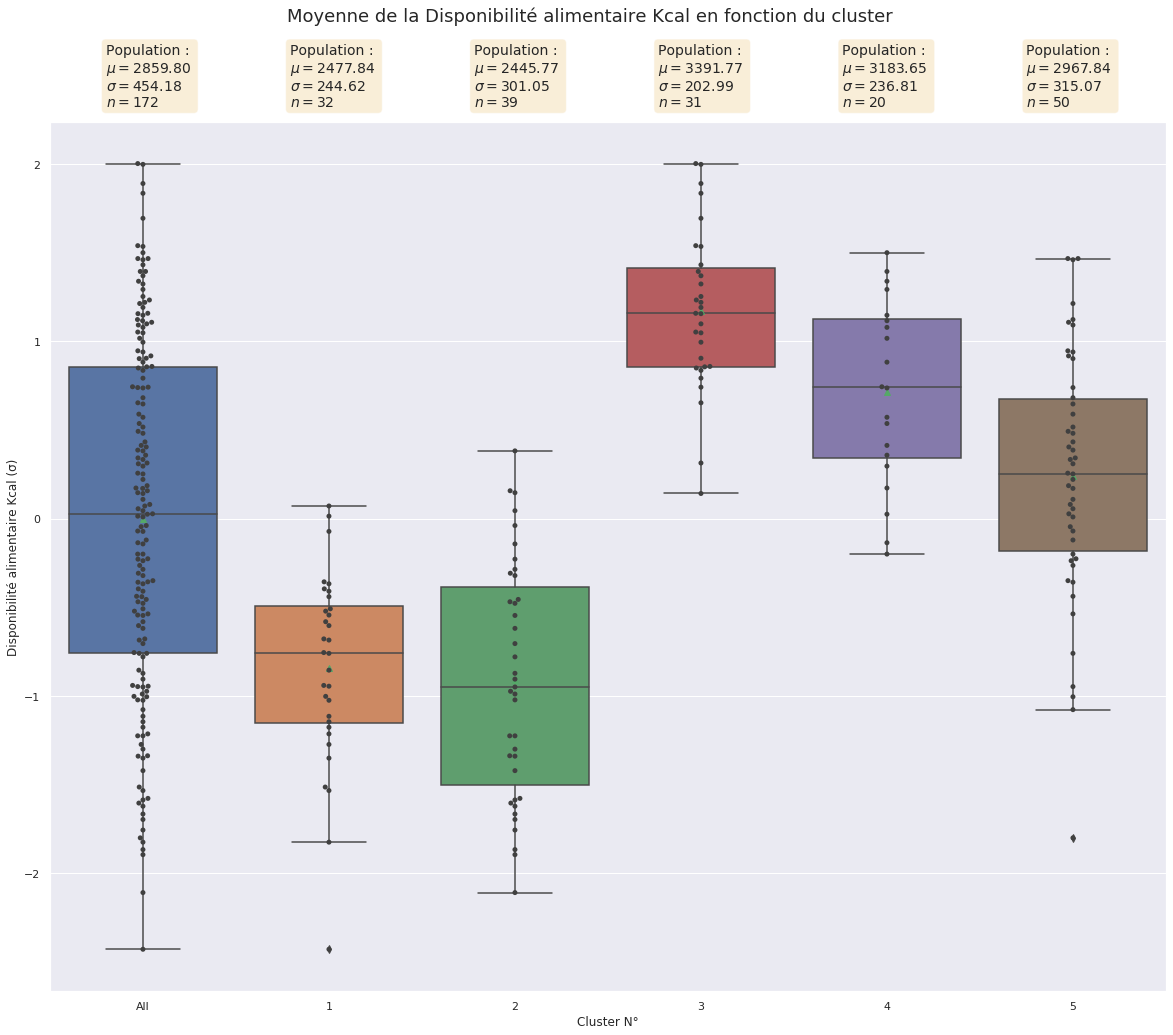

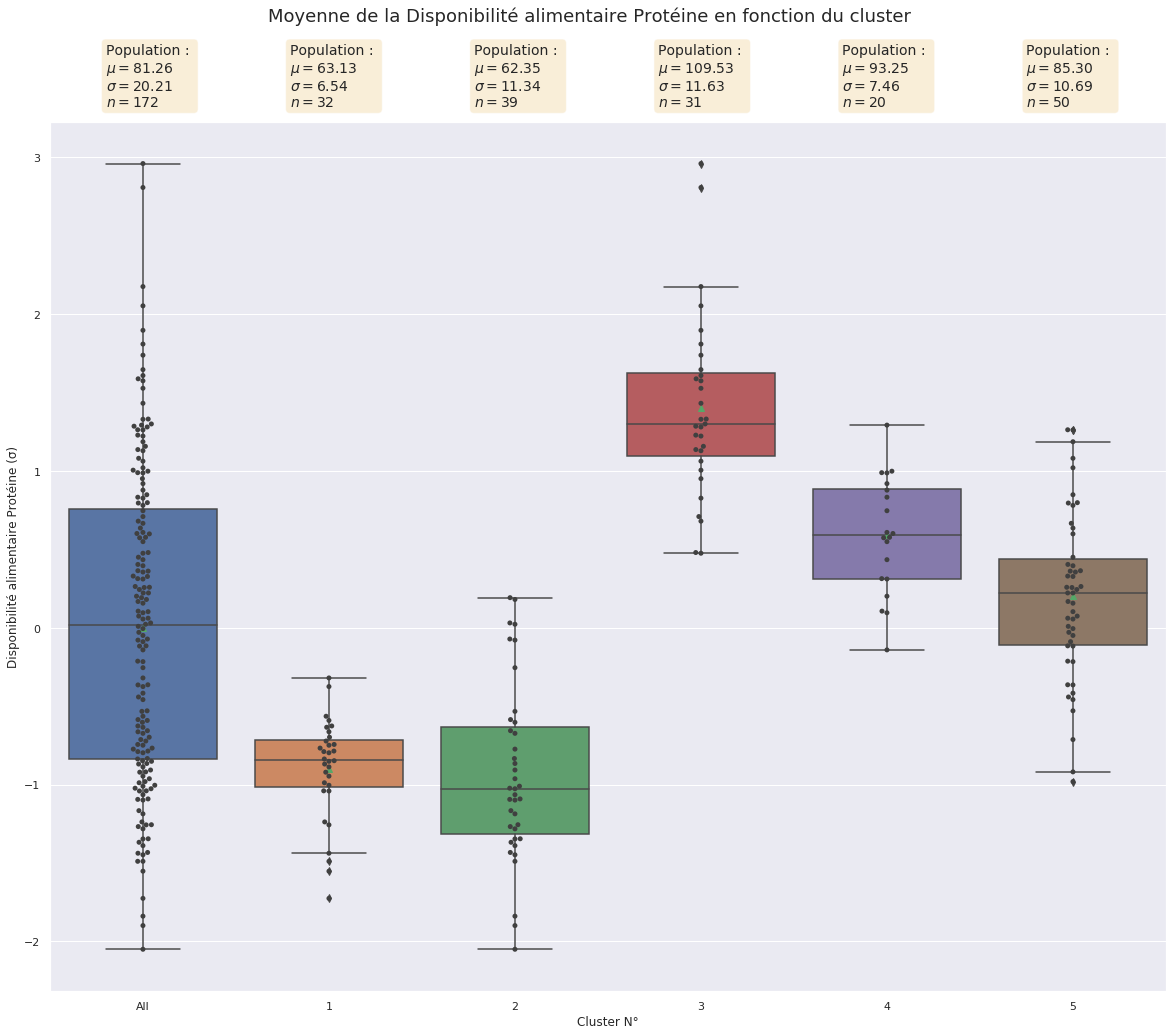

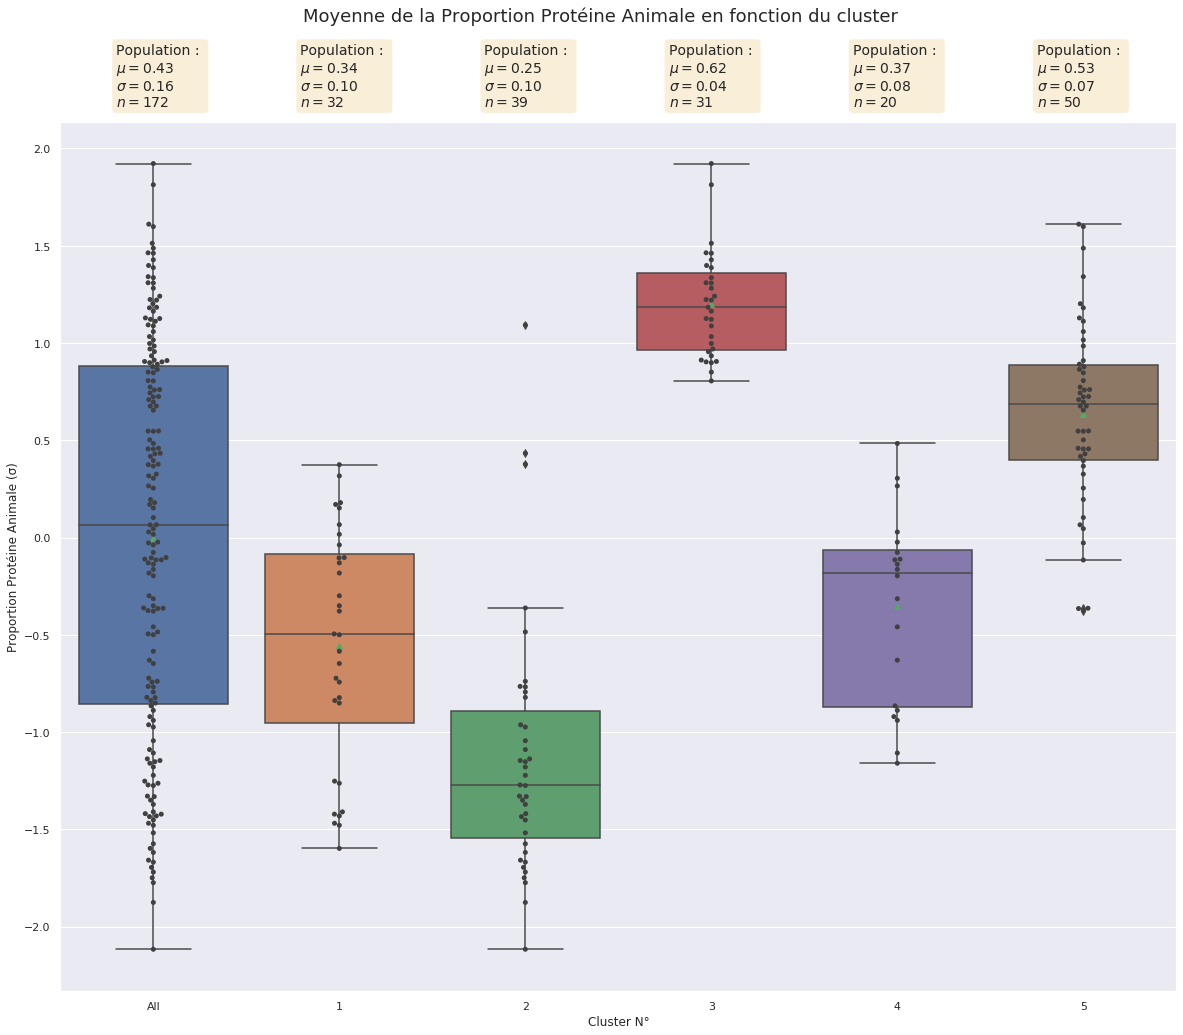

In [24]:
OCR.plotbox(data, clusters)

* Les méthodes simple, average et centroid ne forment que deux clusters conséquents et 3 clusters contenant des outliers
* La méthode median constitue un cluster avec 100 individues et 4 clusters avec moins de 30 individues
* Les méthodes complete et weighted constituent  3 clusters avec une population supérieur à 30
* La méthode ward constitue les clusters les plus équilibrés

### Caractérisation des variables par paires

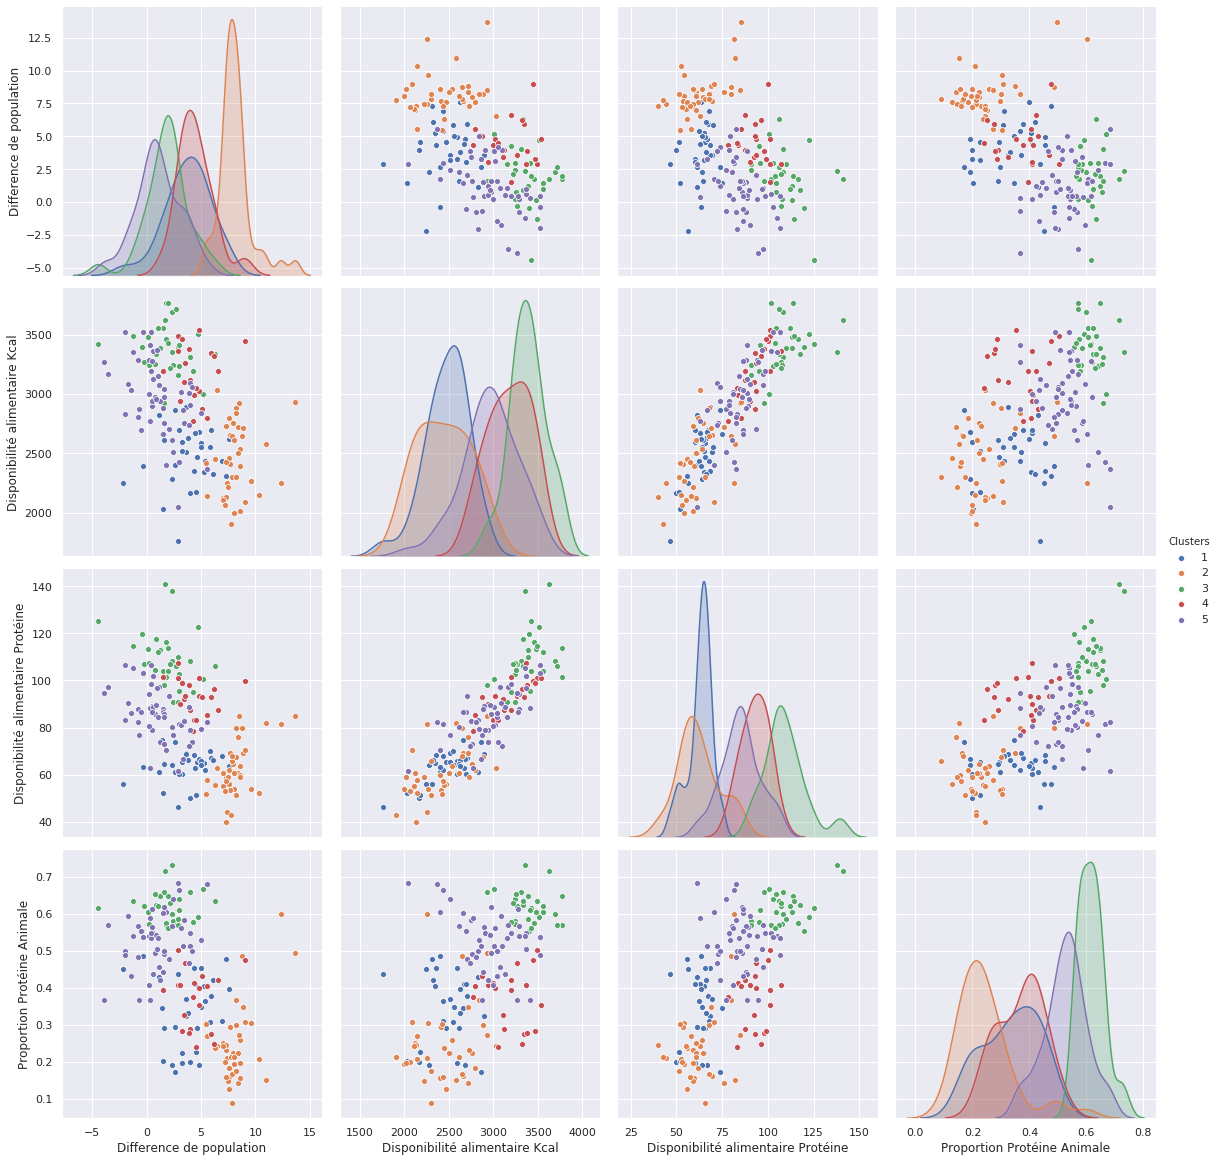

In [25]:
df = pd.DataFrame(data=X)
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]
df['Clusters'] = fcluster(Z, 5, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

--- Conclusion à écrire ---

### Dendrogramme

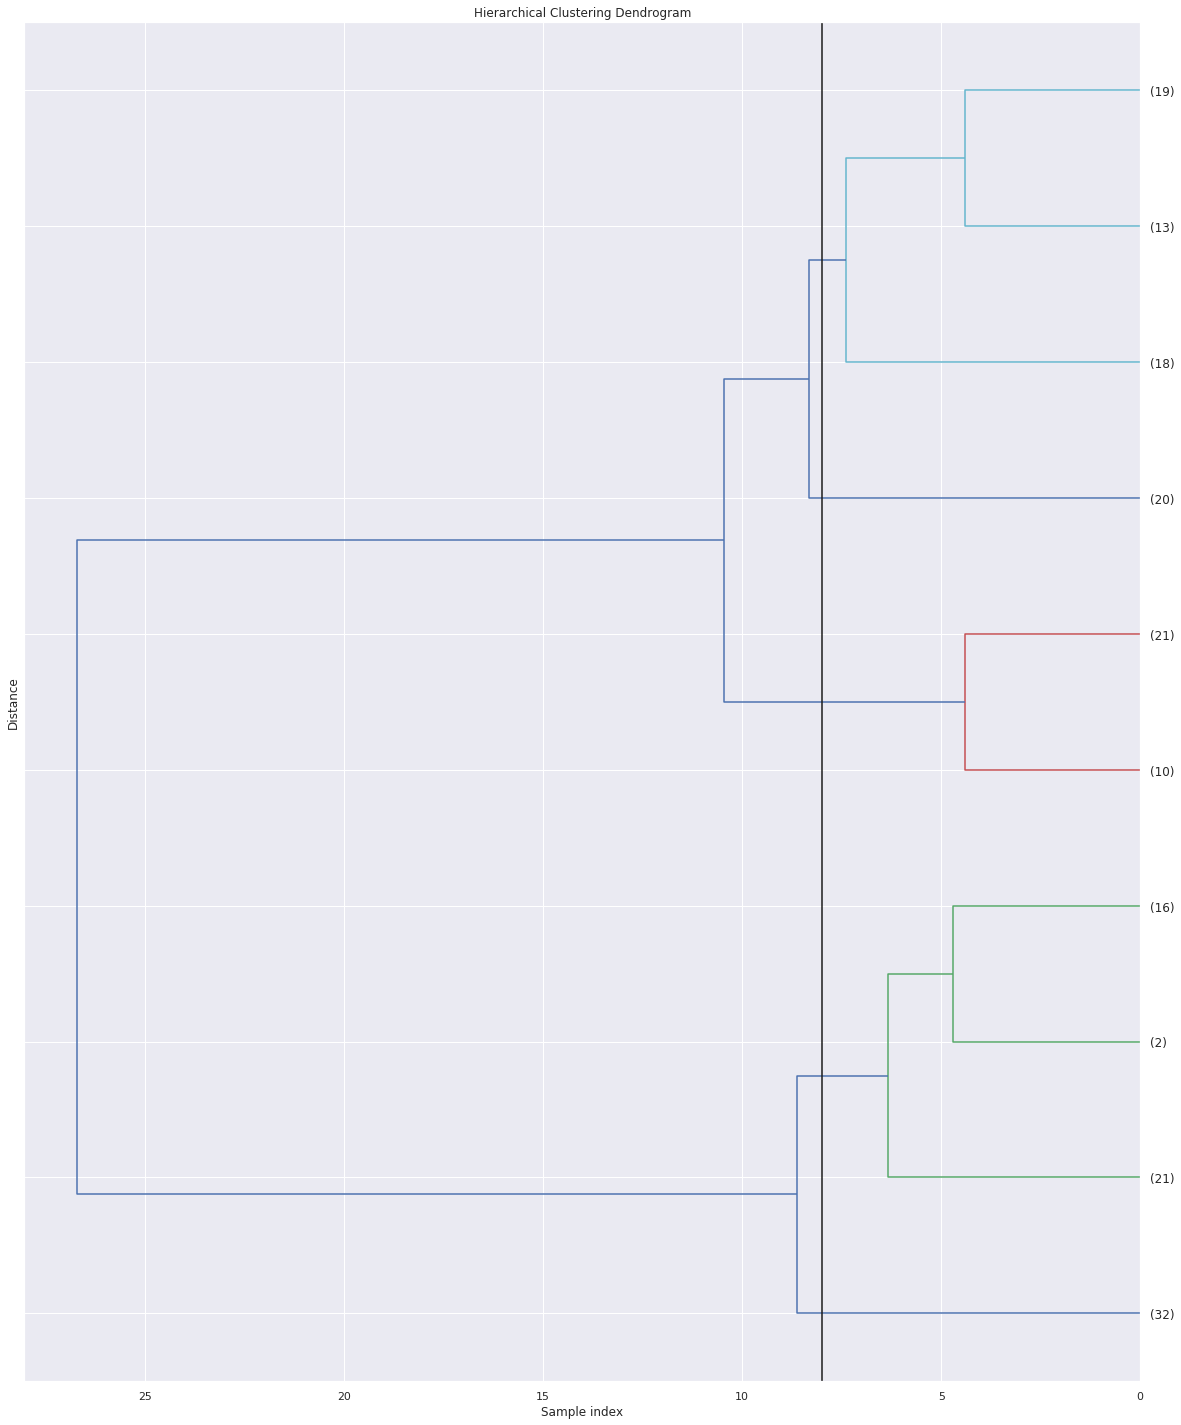

In [26]:
# Affichage du dendrogramme tronqué
plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x=8, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 8,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

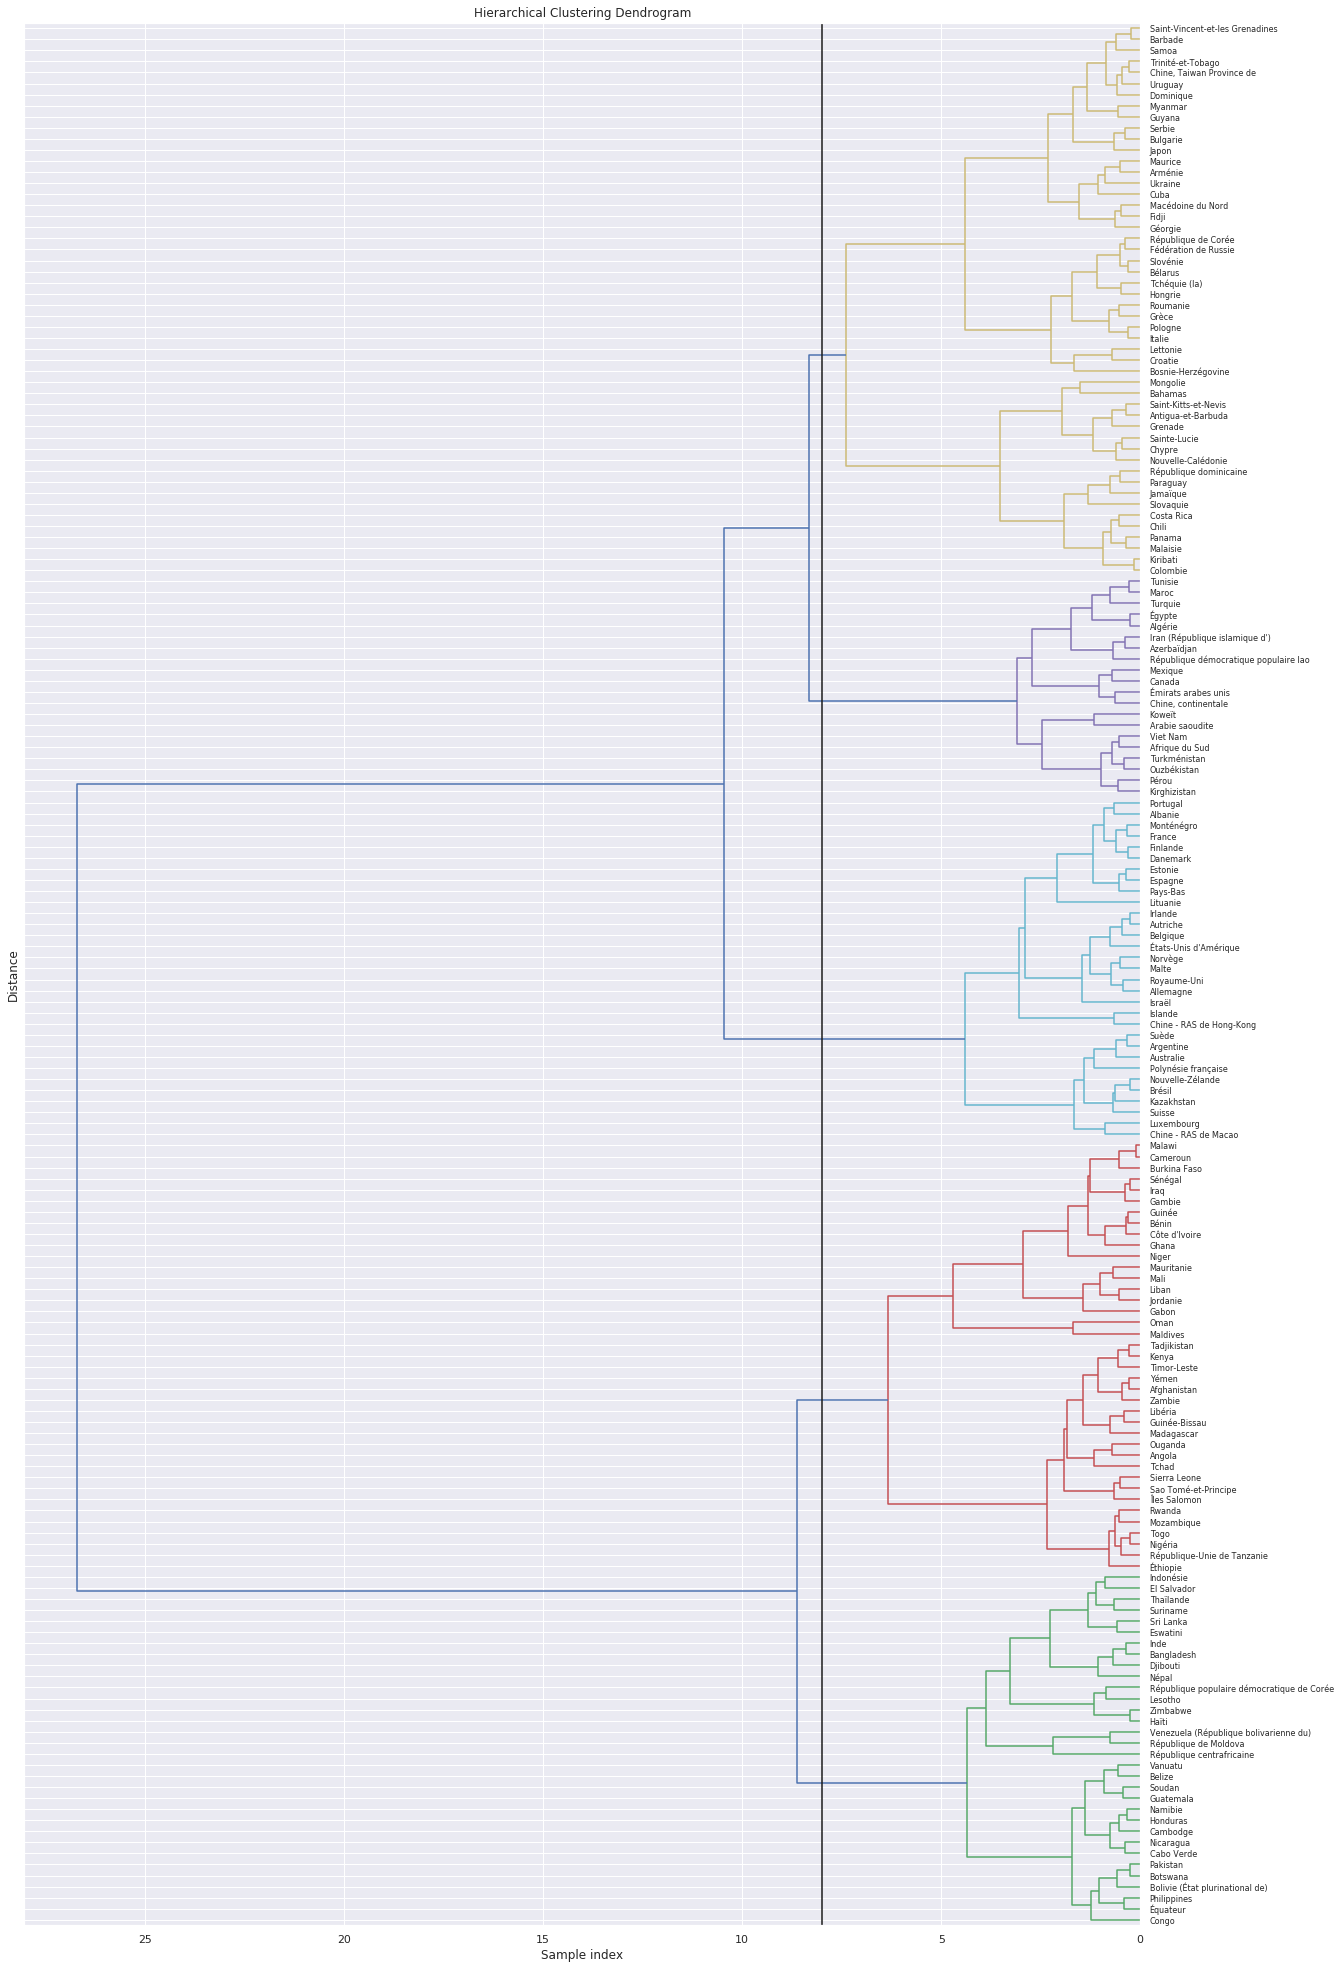

In [27]:
# Affichage du dendrogramme complet
plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x=8, c='k')
dendrogram(
    Z,
    labels = data.index,
    orientation = "left",
    color_threshold = 8,
    leaf_font_size = 8
)
plt.show()

### Affichage et calcul de centroïde

In [28]:
data.groupby(clusters).mean()

,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale,Clusters
1,3.783172,2477.843750,63.128125,0.337672,1
2,8.185871,2445.769231,62.353846,0.246908,2
3,1.878213,3391.774194,109.525806,0.617648,3
4,4.481461,3183.650000,93.248500,0.370540,4
5,1.083659,2967.840000,85.301800,0.527579,5


Nous allons ajouter des variables supplémentaires afin de pouvoir créer 5 clusters avec nos données. Nous choissirons le PIB, l'exportation de viande de poulet, ainsi que l'importation de viande de poulet.

### Importation et Exportation du poulet par pays et par habitant

#### Nettoyer des données

In [29]:
df_data_i_e_raw = pd.read_csv('./Data/data_import_export.csv')

Nous enlevons la Chine qui corresponds à un autre ensemble de pays (Code Zone : 351)

In [30]:
df_data_i_e = df_data_i_e_raw[~(df_data_i_e_raw['Code zone'] == 351)]

#### Préparation du tableau

In [31]:
df_data_i_e['Code Élément'].unique()

array([5610, 5622, 5910, 5922])

In [32]:
codeElementAGarder = [5610, 5910]

In [33]:
df_data_i_e_cleaned = df_data_i_e.copy()

In [34]:
df_data_i_e_cleaned = df_data_i_e[df_data_i_e['Code Élément'].isin(codeElementAGarder)]

In [35]:
colonne = ['Zone', 'Valeur']
df_data_i_e_cleaned = OCR.ligneToColonne(df_data_i_e_cleaned, [1061, 5610, 'Importations - Quantité', colonne])
df_data_i_e_cleaned = OCR.ligneToColonne(df_data_i_e_cleaned, [1061, 5910, 'Exportations - Quantité', colonne])

In [36]:
filt = df_data_i_e_cleaned['Code Élément'] == 5610
colonne = ['Zone', 'Importations - Quantité', 'Exportations - Quantité']
df_data_i_e_cleaned = df_data_i_e_cleaned.loc[filt, colonne]

In [37]:
df_data_i_e_cleaned['Variation - Quantité'] = df_data_i_e_cleaned['Importations - Quantité'] - df_data_i_e_cleaned['Exportations - Quantité']

In [38]:
df_data_i_e_cleaned

,Zone,Importations - Quantité,Exportations - Quantité,Variation - Quantité
0,Afghanistan,241,0.0,241.0
1,Afrique du Sud,777,1785.0,-1008.0
3,Albanie,162,0.0,162.0
4,Allemagne,174768,219054.0,-44286.0
6,Angola,257,0.0,257.0
...,...,...,...,...
305,Vanuatu,202,0.0,202.0
306,Viet Nam,14422,1909.0,12513.0
308,Yémen,61,0.0,61.0
309,Zambie,2,0.0,2.0


In [39]:
colonne = ['Zone', 'Variation - Quantité']
avec = ['Zone']
data = data.merge(df_data_i_e_cleaned.loc[: , colonne], how = 'left', on = avec).fillna(0)

,Zone,Difference de population,Disponibilité alimentaire Kcal,Disponibilité alimentaire Protéine,Proportion Protéine Animale,Clusters,Variation - Quantité
0,Afghanistan,8.059596,2000.0,54.09,0.195045,2,241.0
1,Afrique du Sud,4.324821,2994.0,83.41,0.414339,4,-1008.0
2,Albanie,-0.420572,3400.0,119.55,0.554914,3,162.0
3,Algérie,5.956869,3349.0,92.91,0.276719,4,0.0
4,Allemagne,1.461473,3556.0,104.20,0.605374,3,-44286.0
...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),-2.178354,2247.0,56.28,0.450782,1,0.0
168,Viet Nam,3.051565,2938.0,90.03,0.408864,4,12513.0
169,Yémen,7.225949,2063.0,53.23,0.200263,2,61.0
170,Zambie,8.626110,2013.0,59.09,0.197834,2,2.0


In [67]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

ValueError: could not convert string to float: 'Afghanistan'

---------------------------- Début Brouillon ------------------------

In [41]:
df_data_i_e_cleaned[df_data_i_e_cleaned['Exportations - Quantité'] > 0]

,Zone,Importations - Quantité,Exportations - Quantité,Variation - Quantité
1,Afrique du Sud,777,1785.0,-1008.0
4,Allemagne,174768,219054.0,-44286.0
11,Arabie saoudite,14955,4596.0,10359.0
13,Argentine,5175,1851.0,3324.0
15,Arménie,231,5.0,226.0
...,...,...,...,...
295,Tunisie,27,88.0,-61.0
298,Turquie,30,24282.0,-24252.0
301,Ukraine,2132,1459.0,673.0
303,Uruguay,4084,11.0,4073.0


In [42]:
silhouette

,2,3,4,5,6,7,8,9,10
Single,0.197957,0.124644,0.126938,0.004341,-0.059511,-0.081512,-0.130853,-0.147936,-0.157472
Complete,0.317448,0.263140,0.247429,0.244513,0.252764,0.201339,0.230718,0.225390,0.227323
Average,0.417048,0.390138,0.292615,0.262507,0.199610,0.166721,0.162243,0.100506,0.078947
Weighted,0.322725,0.223139,0.259714,0.240643,0.214820,0.224826,0.212937,0.207615,0.187904
Centroid,0.000000,0.398764,0.310991,0.277348,0.251461,0.170602,0.145922,0.145922,0.099558
Median,0.317659,0.281994,0.196538,0.153476,0.153476,0.214899,0.199925,0.191505,0.184365
Ward,0.431345,0.291186,0.215504,0.236917,0.238267,0.240679,0.243635,0.217935,0.226006


Nous voyons que : 
 * le cluster 1 - en bleu - est en croissance démographique modéré, avec une disponibilité alimentaire convenable.
 * le cluster 2 - en orange - a une croissance démographique faible et une proportion de protéine alimentaire forte
 * le cluster 3 - en vert - est en croissance démographique forte et une proportion de protéine alimentaire faible 
 * le cluster 4 - en rouge - a une croissance démographique modérée et une proportion de protéine alimentaire faible
 * le cluster 5 - en violet - est en croissance démographique faible avec une proportion de protéine alimentaire élevée 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

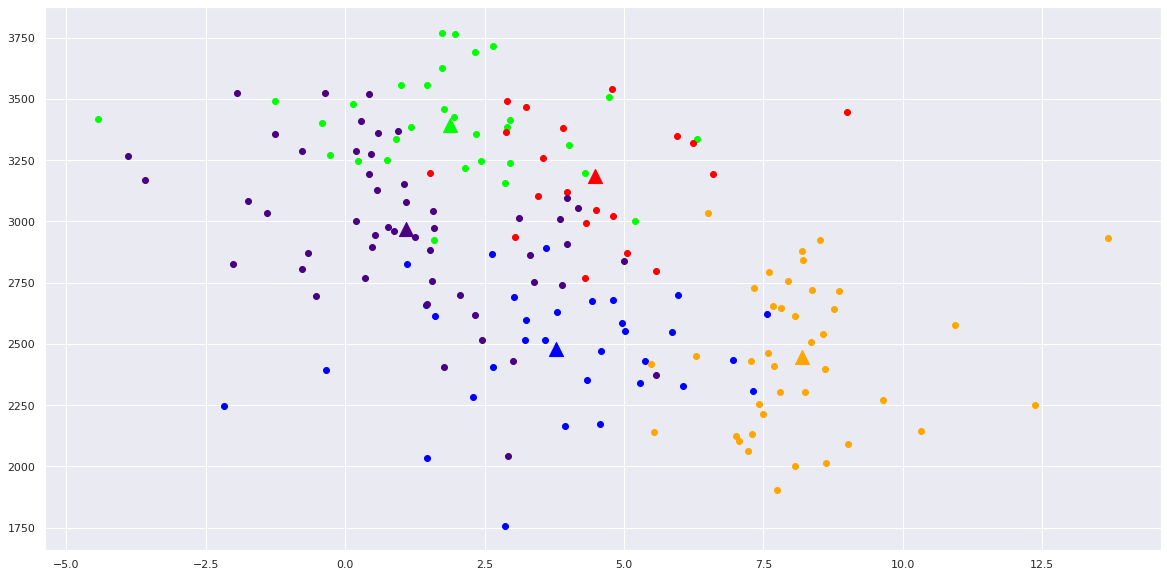

In [43]:
fig = plt.figure(figsize=(20,10))
        
color1=[0, 0, 1, 1]
color2=[1, 0.65, 0, 1]
color3=[0, 1, 0, 1]
color4=[1, 0, 0, 1]
color5=[0.29, 0, 0.51, 1]

colormap = np.array([color1, color2, color3, color4, color5])

# affichage des points
for i in range(1,6):
    plt.scatter(df[df['Clusters'] == i].iloc[:, 0], df[df['Clusters'] == i].iloc[:, 1], c = colormap[i-1])
    meanD1 = df[df['Clusters'] == i].iloc[:, 0].mean()
    meanD2 = df[df['Clusters'] == i].iloc[:, 1].mean()
    plt.scatter(meanD1, meanD2, marker = '^', s = 200, c = colormap[i-1])
    
plt.show()

### Calcul de correlation

In [44]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1):
        statp, pp = pearsonr(df.iloc[:,i], df.iloc[:,j])
        stats, ps = spearmanr(df.iloc[:,i], df.iloc[:,j])
        print('corrélation entre', df.columns[i], 'et', df.columns[j])
        print('Pearson : stat=%.3f, p=%.3f' % (statp, pp))
        print('Spearman : stat=%.3f, p=%.3f' % (stats, ps))
        if pp > 0.05:
            print('Probably independent following Pearson Test')
        else:
            print('Probably dependent following Pearson Test')
            
        if ps > 0.05:
            print('Probably independent following Spearman Test\n')
        else:
            print('Probably dependent following Spearman Test\n')

corrélation entre Difference de population et Disponibilité alimentaire Kcal
Pearson : stat=-0.491, p=0.000
Spearman : stat=-0.510, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Disponibilité alimentaire Protéine
Pearson : stat=-0.496, p=0.000
Spearman : stat=-0.524, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Proportion Protéine Animale
Pearson : stat=-0.559, p=0.000
Spearman : stat=-0.573, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Disponibilité alimentaire Kcal et Disponibilité alimentaire Protéine
Pearson : stat=0.879, p=0.000
Spearman : stat=0.897, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Disponibilité alimentaire Kcal et Proportion Protéine Animale
Pearson

## Partie III - Réalisation du ACP

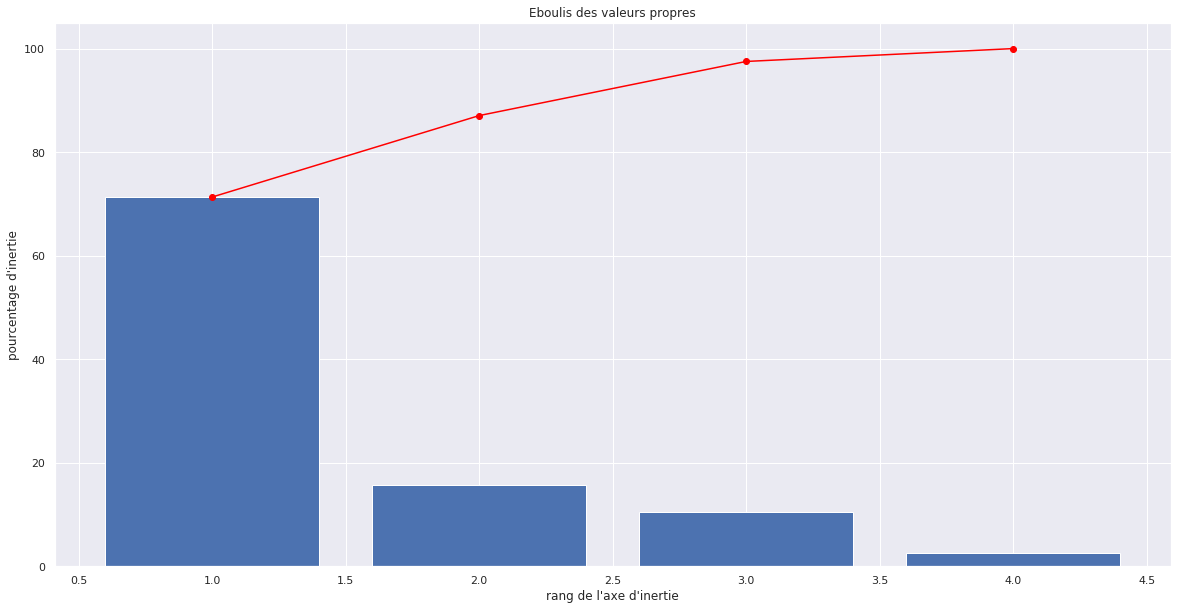

In [45]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

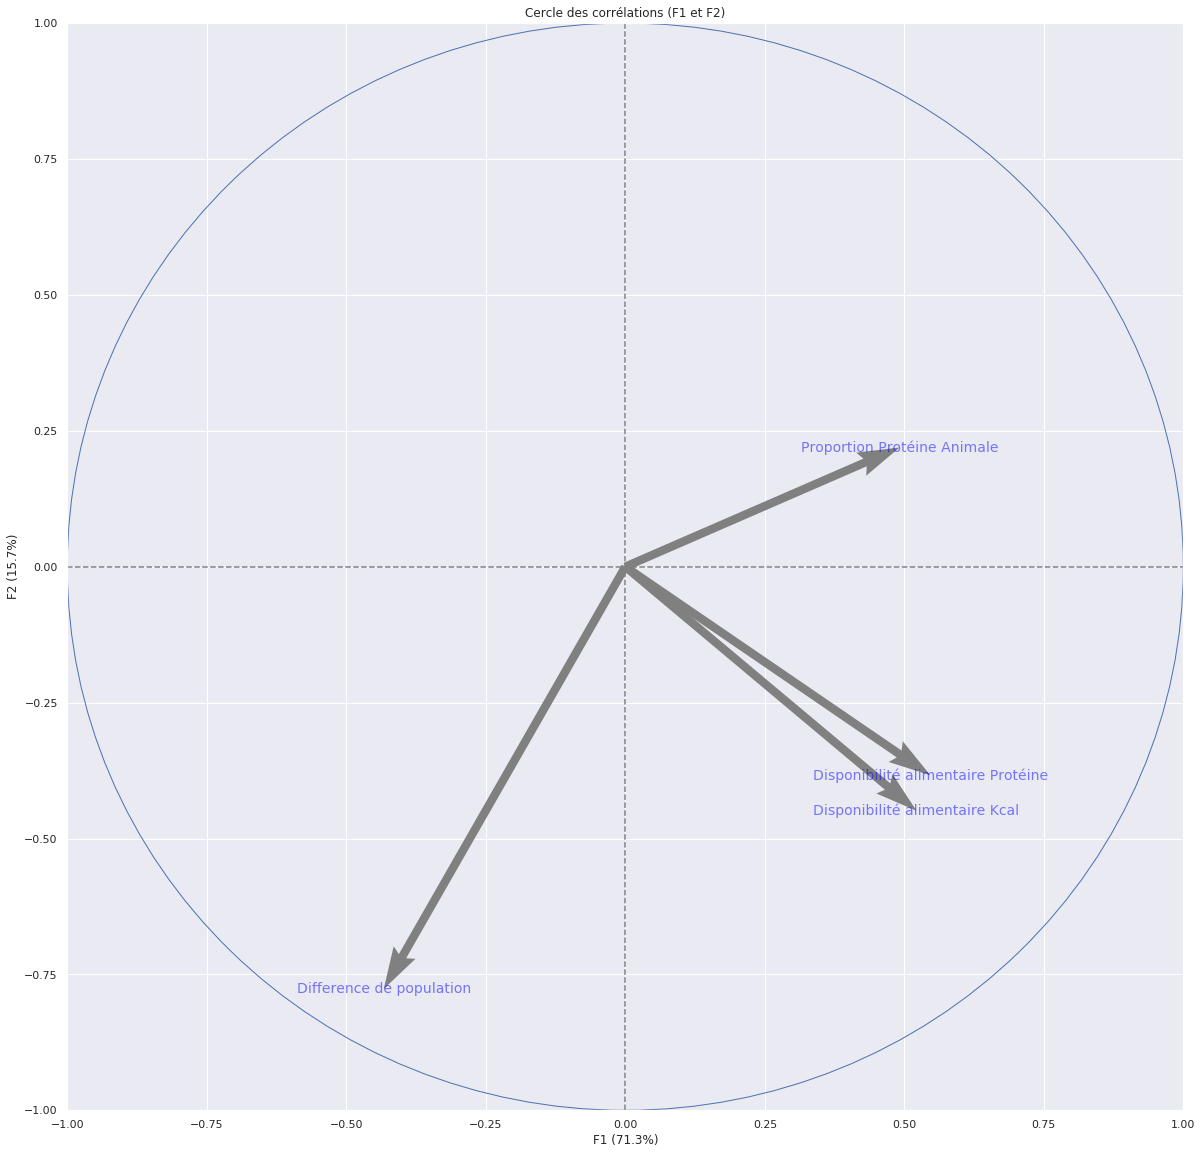

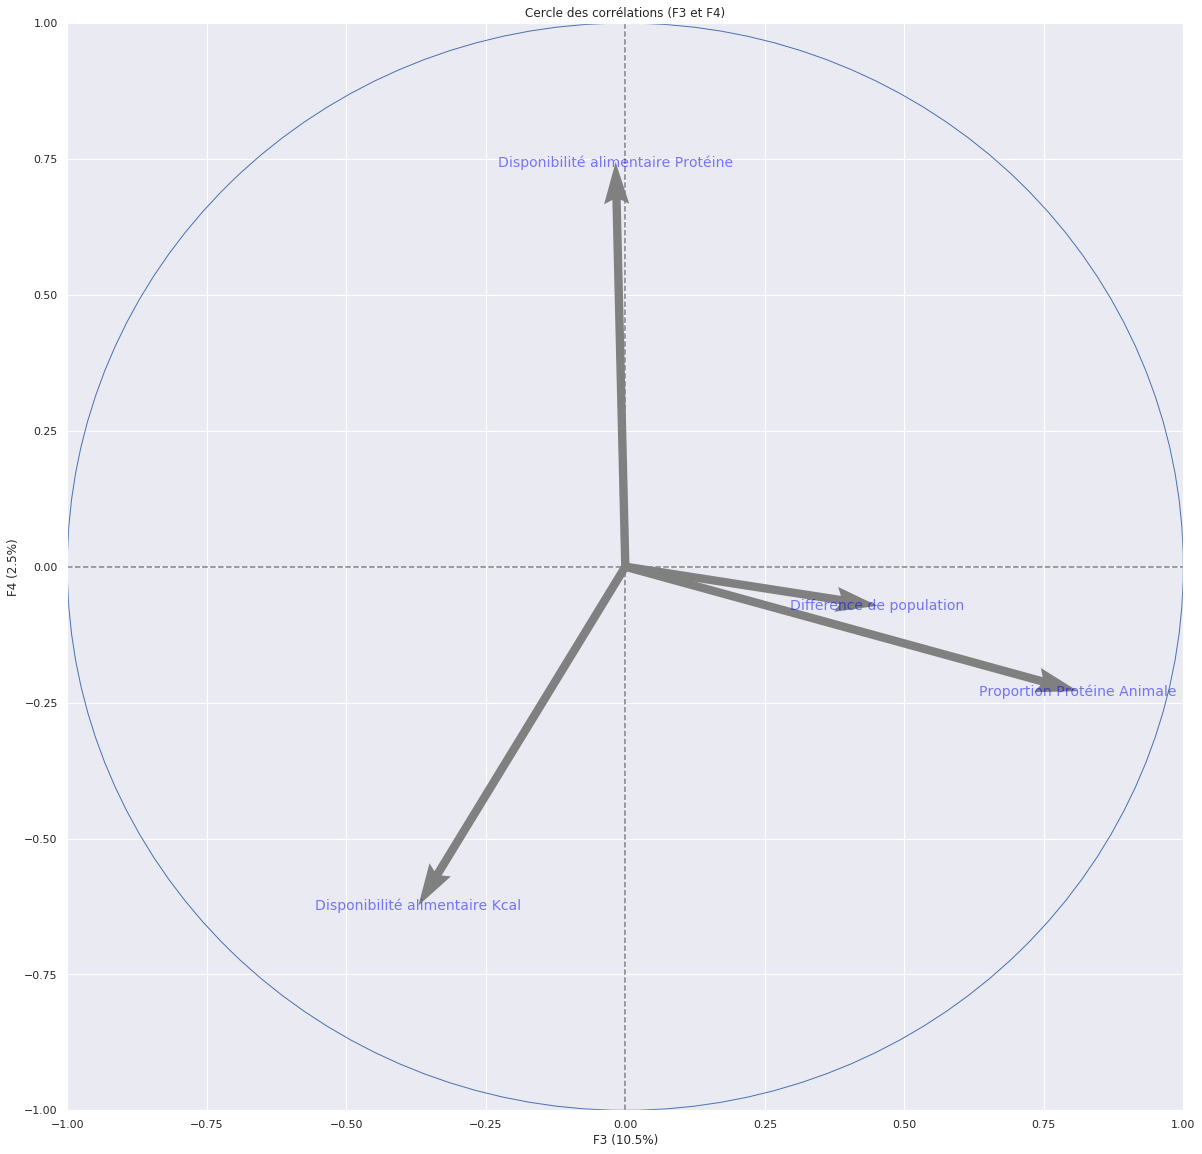

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

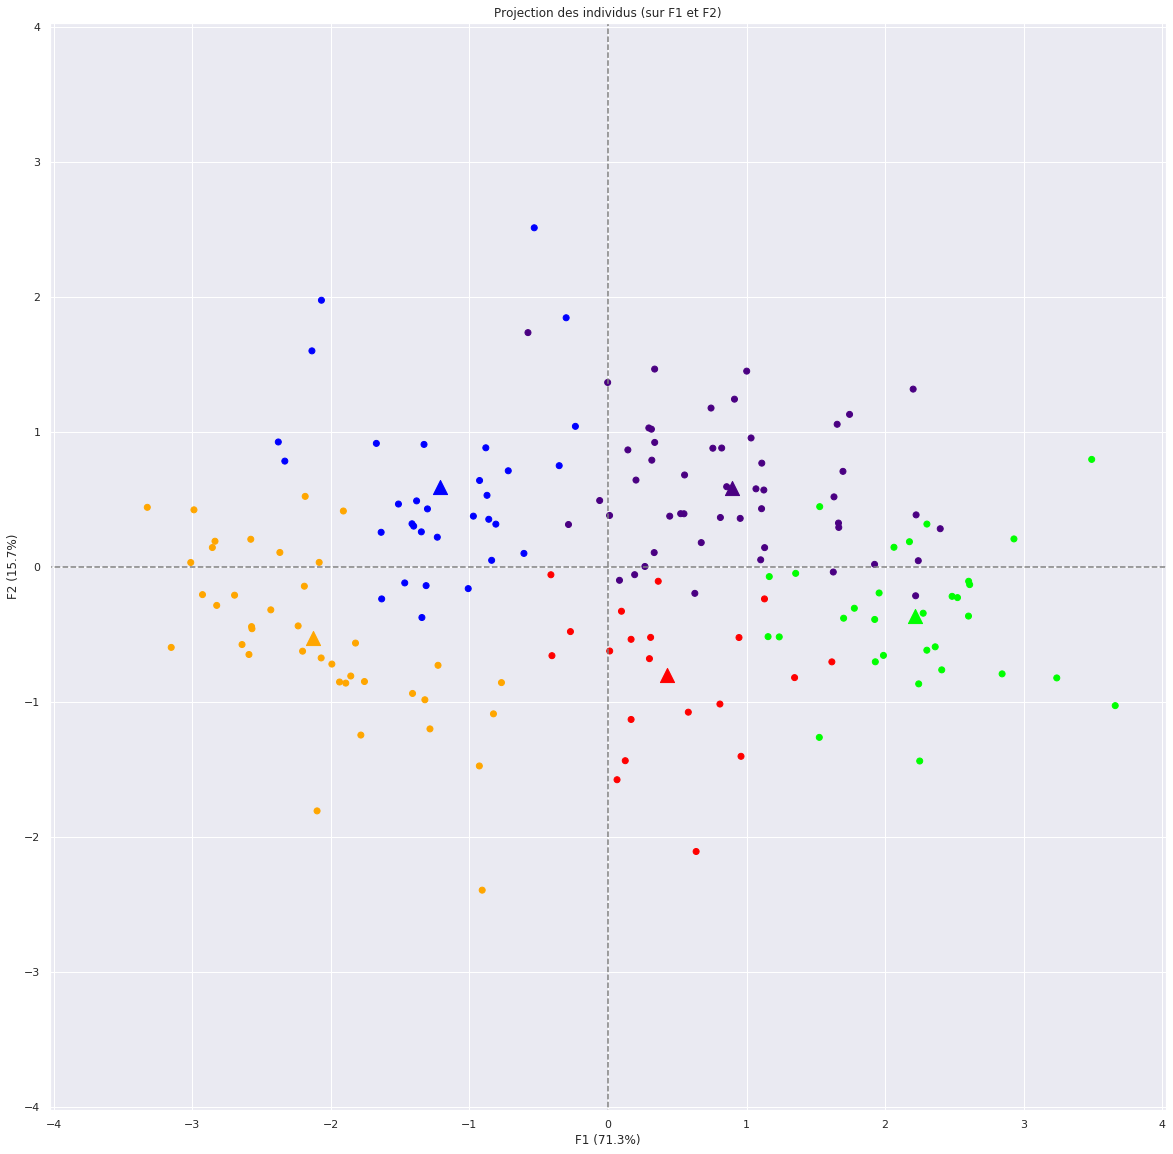

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

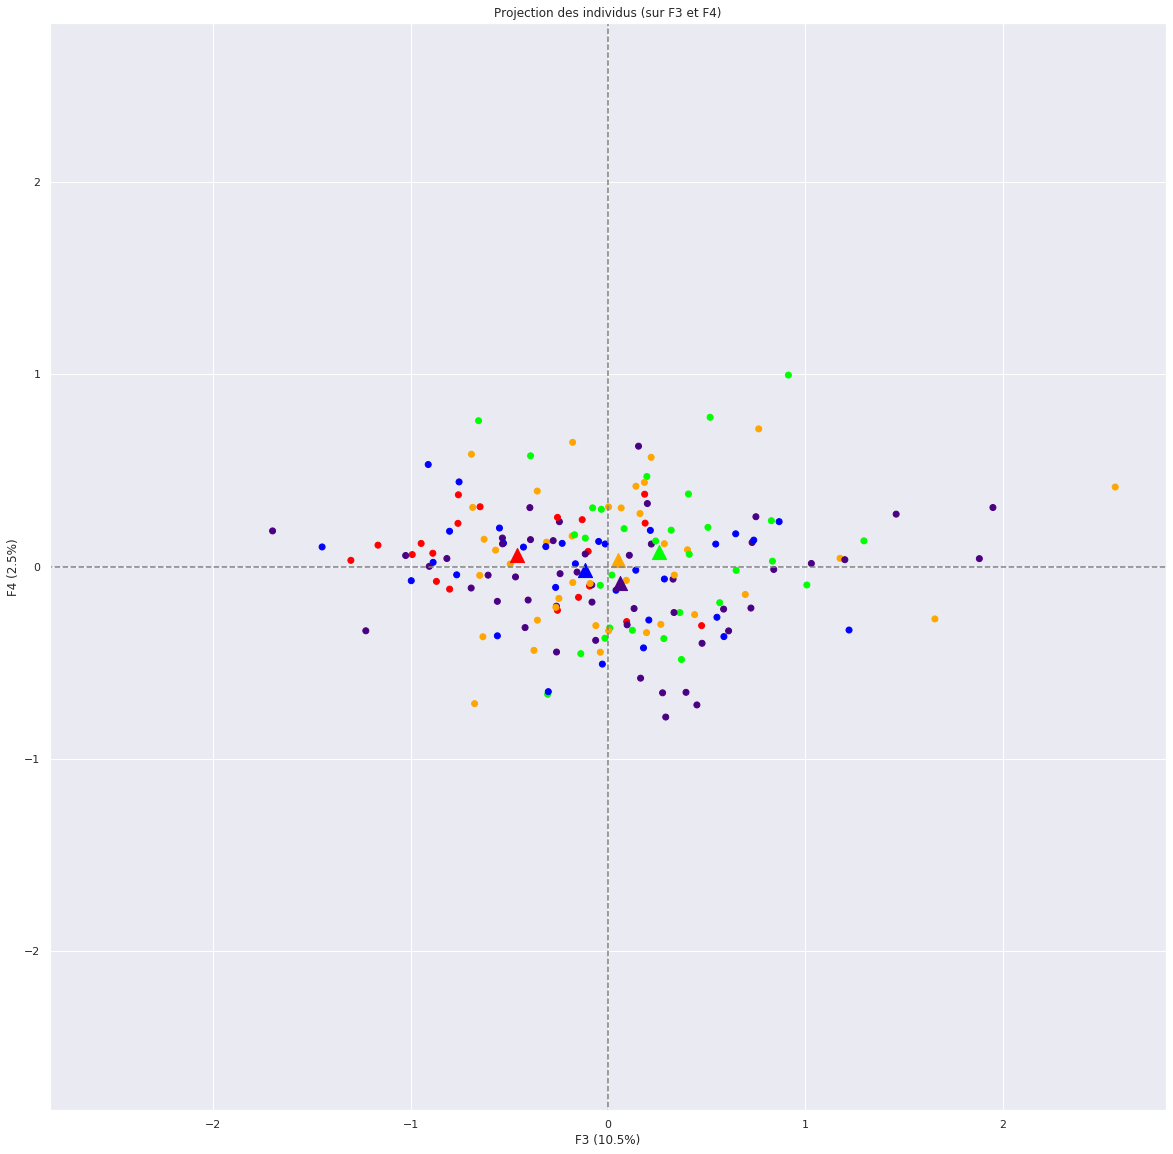

In [46]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], df['Clusters'])#, labels = np.array(names))

In [47]:
pcs

array([[-0.43284097,  0.52185509,  0.5465212 ,  0.49155929],
       [-0.77661419, -0.4489841 , -0.38363309,  0.21933838],
       [ 0.45204621, -0.37084989, -0.01736705,  0.81106287],
       [-0.07192581, -0.62333851,  0.74420334, -0.22899163]])

In [48]:
color1=(0, 0, 1, 1)
color2=(1, 0.65, 0, 1)
color3=(0, 1, 0, 1)
color4=(1, 0, 0, 1)
color5=(0.29, 0, 0.51, 1)

colormap = np.array([color1, color2, color3, color4, color5]).reshape(1,-1)
colormap

array([[0.  , 0.  , 1.  , 1.  , 1.  , 0.65, 0.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 0.  , 0.  , 1.  , 0.29, 0.  , 0.51, 1.  ]])

## Partie IV - Choix des Clusters

Nous allons choisir les clusters 1 - bleu - et 5 - mauve

Test de normalité pour le cluster 1 et la colonne Difference de population
stat=0.974, p=0.628


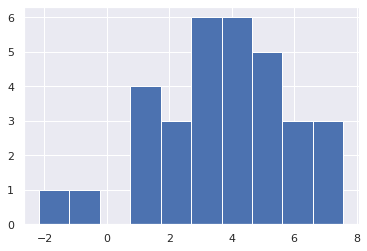

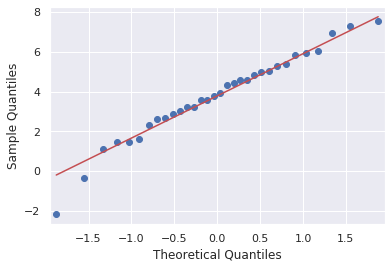

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Kcal
stat=0.961, p=0.299


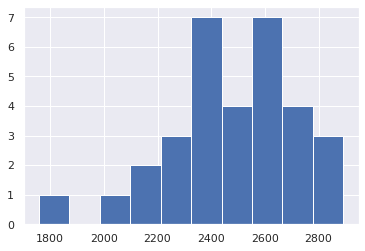

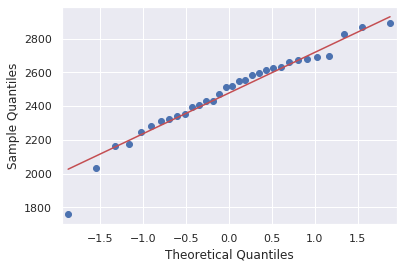

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Protéine
stat=0.935, p=0.054


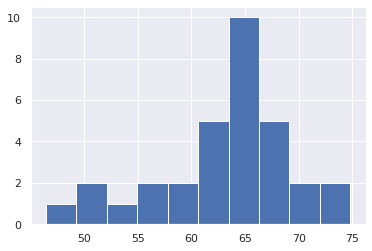

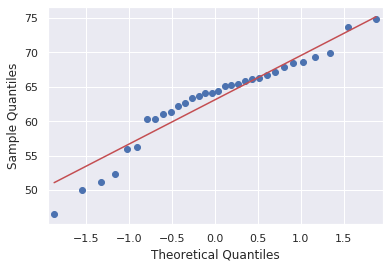

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Proportion Protéine Animale
stat=0.934, p=0.051


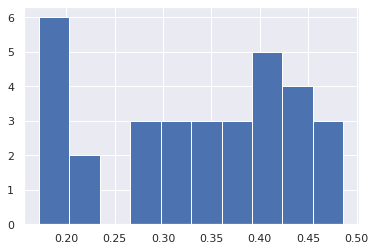

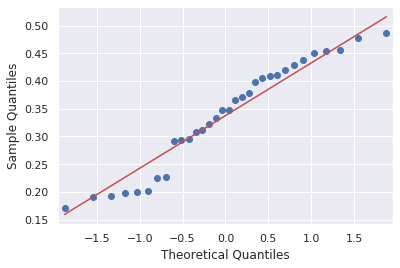

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Difference de population
stat=0.984, p=0.738


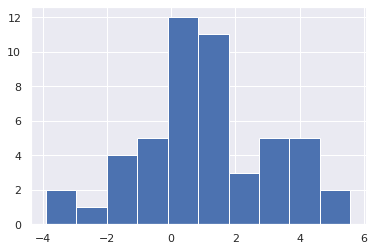

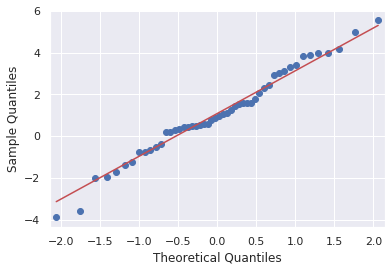

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Kcal
stat=0.978, p=0.465


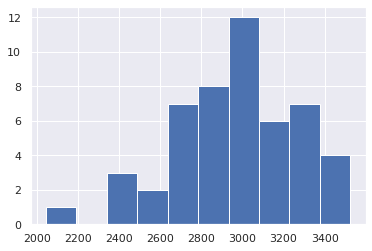

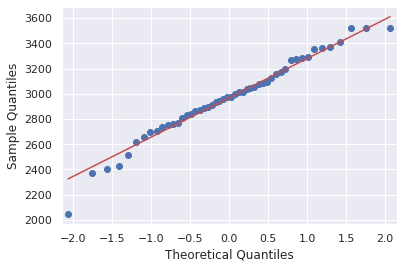

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Protéine
stat=0.983, p=0.694


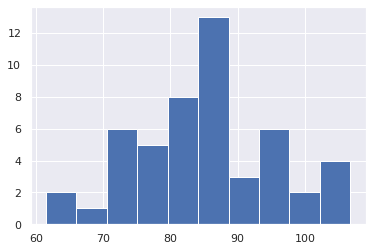

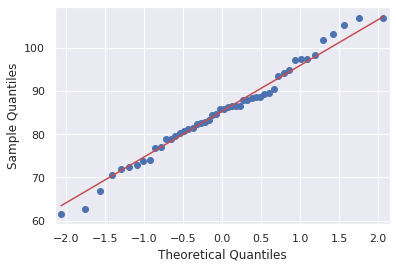

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Proportion Protéine Animale
stat=0.980, p=0.534


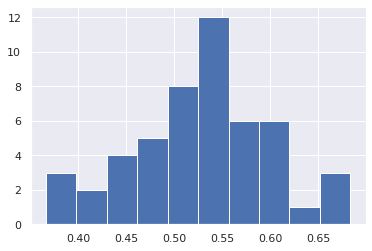

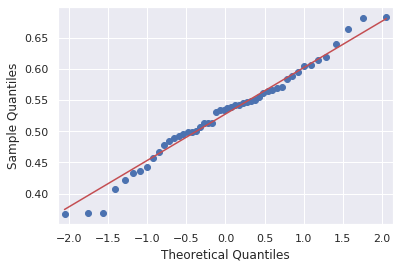

Probably Gaussian



In [49]:
for i in (1,5):
    for j in range(0, len(df.columns)-1):
        stat, p = shapiro(df[df['Clusters'] == i].iloc[:, j])
        print('Test de normalité pour le cluster', i, 'et la colonne', df.columns[j])
        print('stat=%.3f, p=%.3f' % (stat, p))
        plt.hist(df[df['Clusters'] == i].iloc[:, j])
        qqplot(df[df['Clusters'] == i].iloc[:, j], line='s')
        plt.show()
        if p > 0.05:
            print('Probably Gaussian\n')
        else:
            print('Probably not Gaussian\n')

In [50]:
df[df['Clusters'] == 1].iloc[:, 0]

14     3.236388
18     5.961093
20     4.345006
22     5.281441
26     3.577674
27     4.590488
37     7.312320
43     4.808813
46     1.455825
48     4.965756
51     2.648447
64     5.863031
68     3.945961
69     5.020888
72     3.217805
73     3.598279
88     2.299274
109    5.377857
110    2.629857
111    3.792102
120    6.061002
125    4.430598
129    2.868569
131   -0.338204
134    1.463006
149    6.948086
150    1.606965
153    3.020158
157    1.114091
166    7.572414
167   -2.178354
171    4.564857
Name: Difference de population, dtype: float64

## Partie IV - Application de l'ACP sur le Dendrogramme

### Préparation des données - Centrage et Réduction

In [51]:
# préparation des données pour le clustering
X = pd.DataFrame(data = X_projected).values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# generate the linkage matrix
Z = linkage(X_scaled, 'ward')

### Cophenetic correlation

In [52]:
c, coph_dists = cophenet(Z, pdist(X_projected))
f"Cophenetic correlation : {c:0.2f}"

'Cophenetic correlation : 0.47'

### Courbe de Lorenz

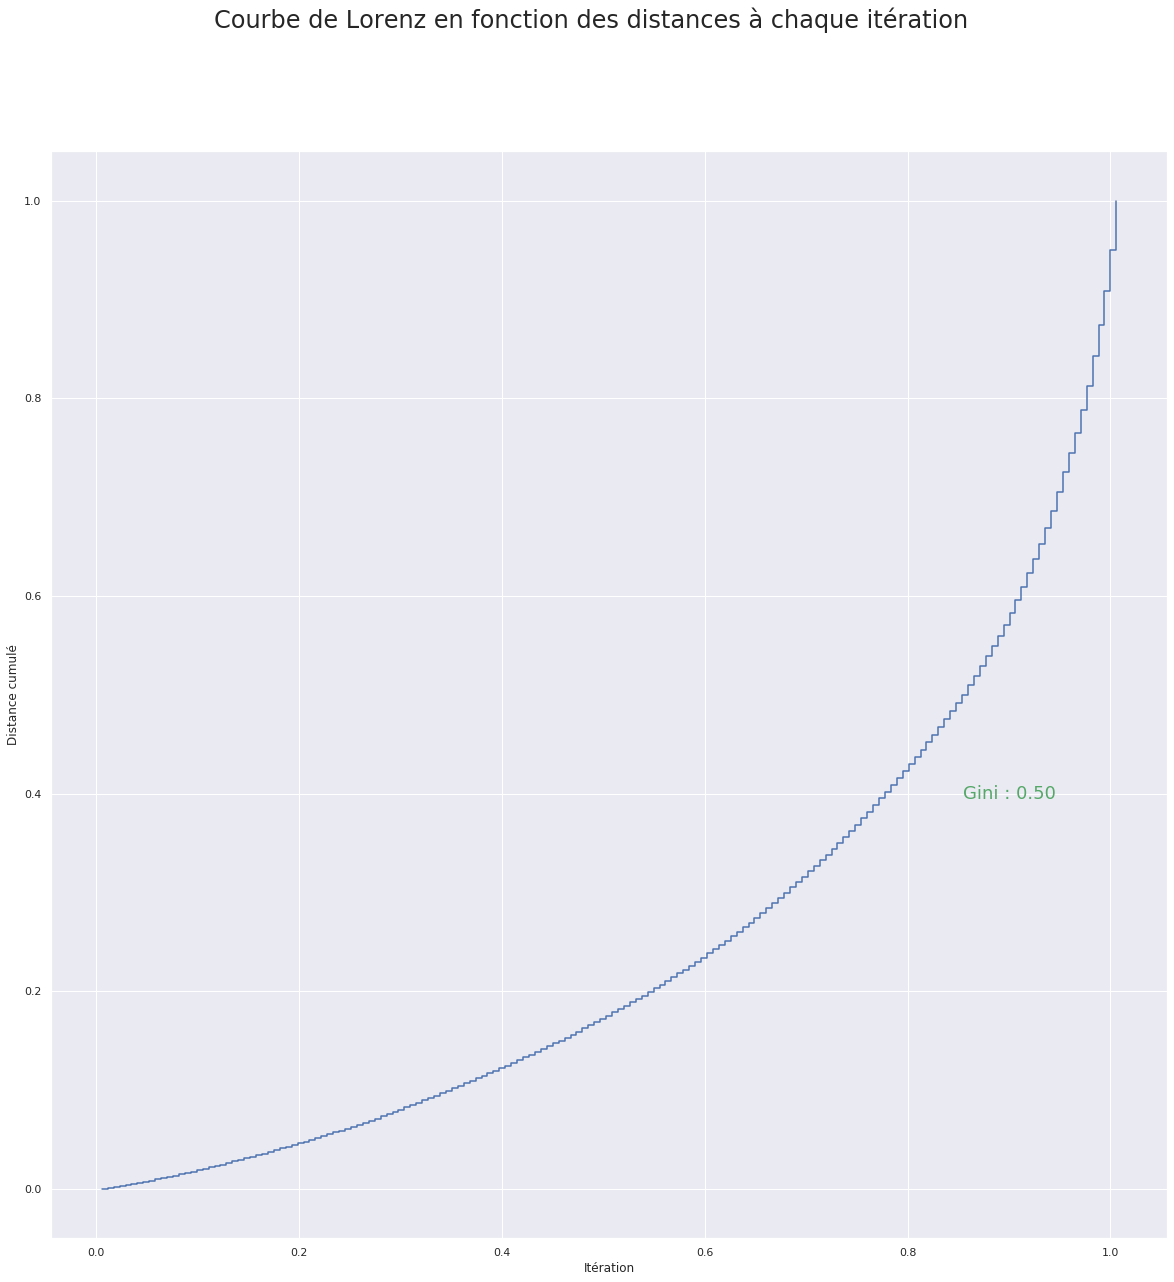

In [53]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

### Dendrogramme

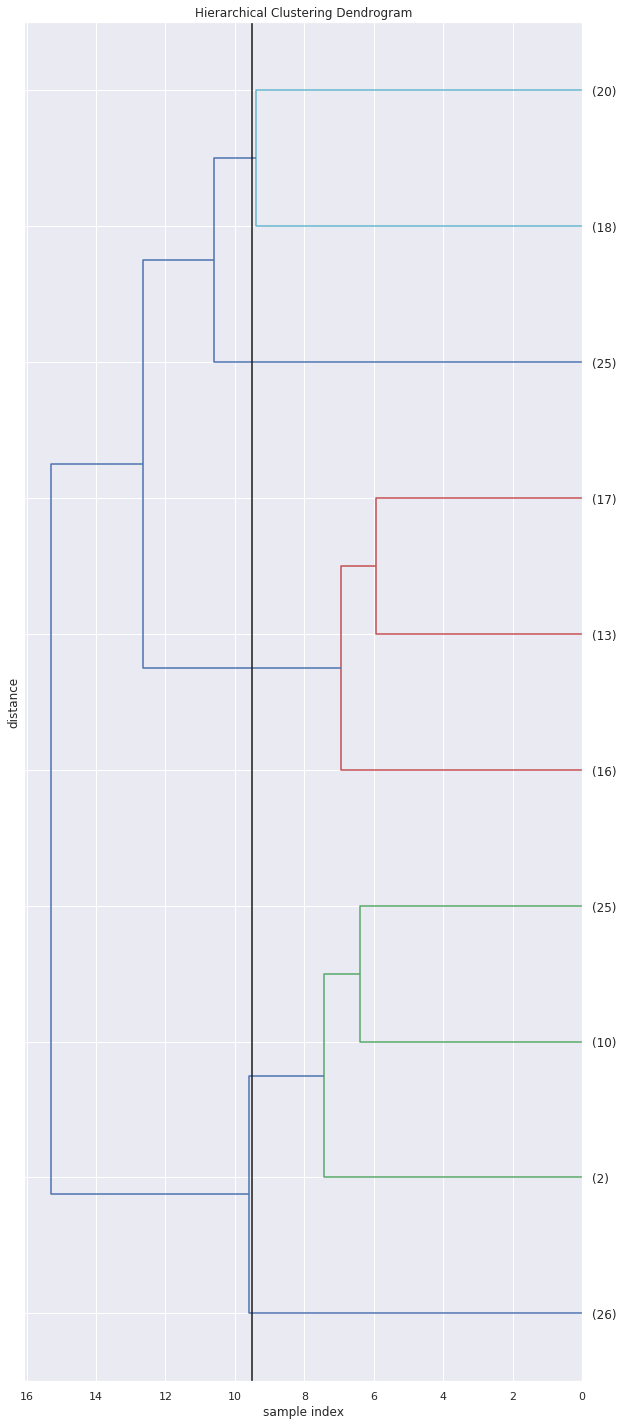

In [54]:
# Affichage du dendrogramme tronqué
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=9.5, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 9.5,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

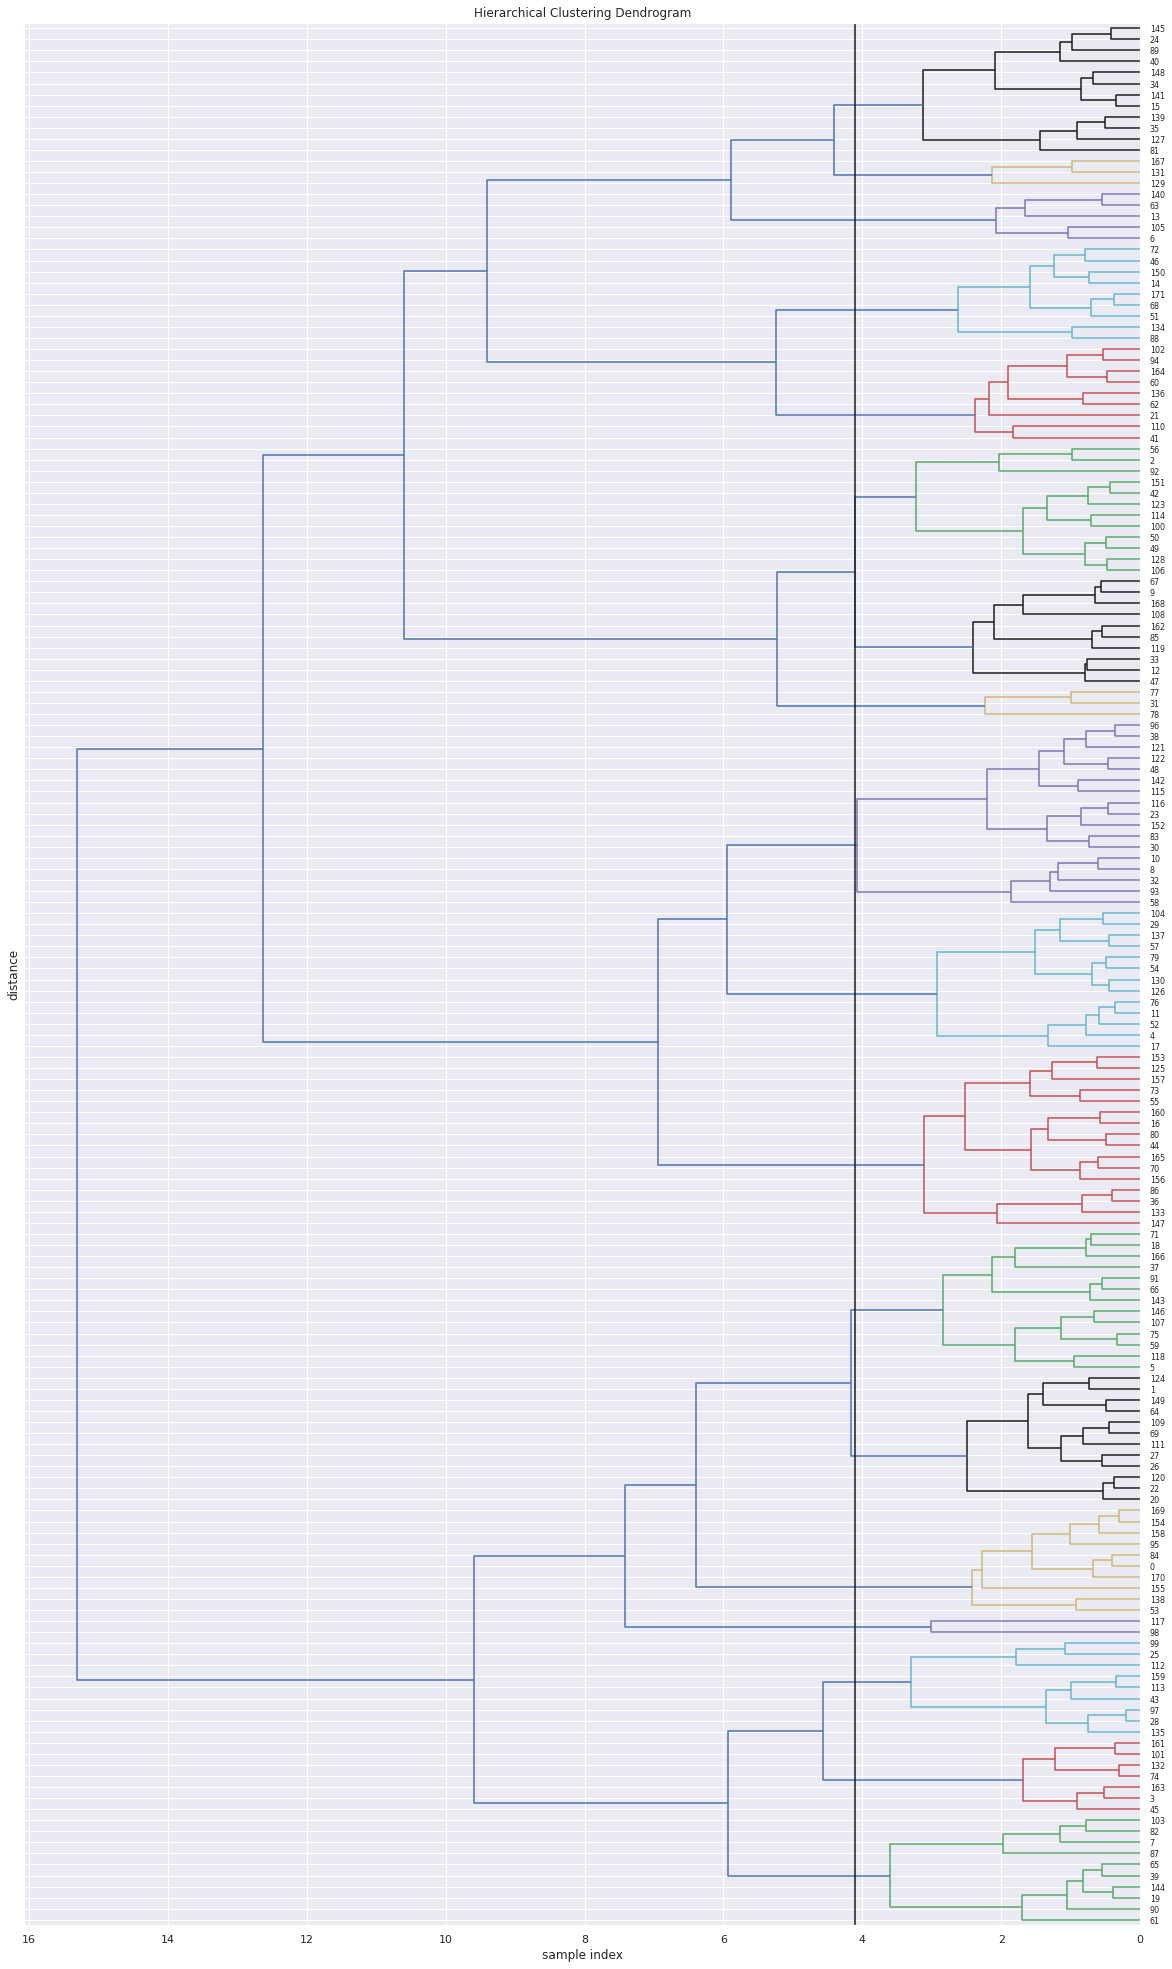

In [55]:
# Affichage du dendrogramme complet
plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=4.1, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 4.1,
    leaf_font_size = 8
)
plt.show()

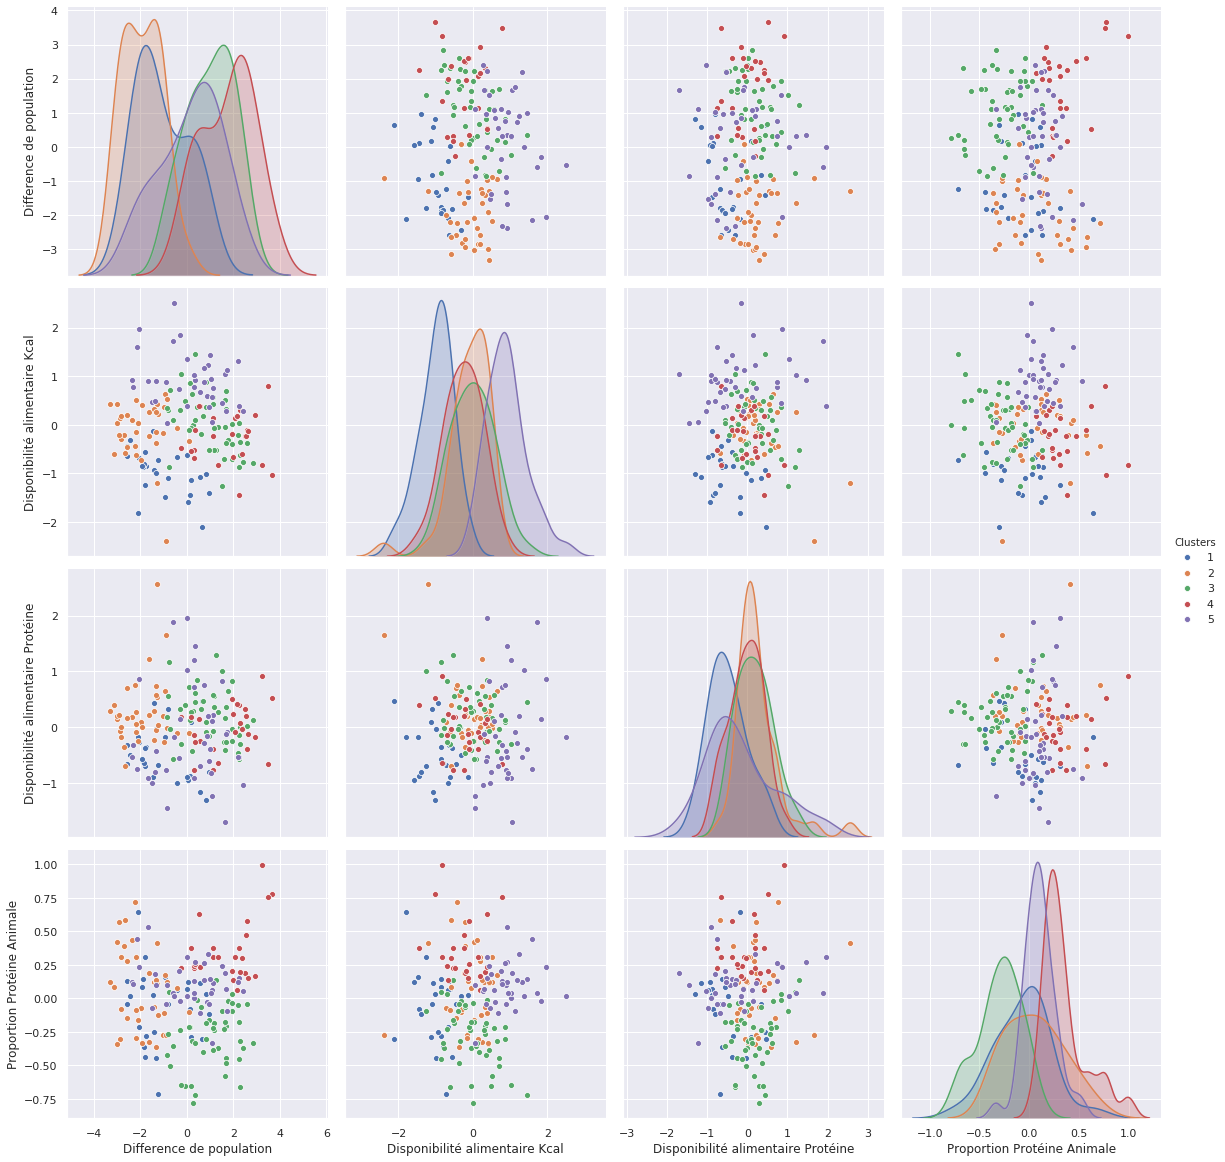

In [56]:
df = pd.DataFrame(data=X_projected)
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]
df['Clusters'] = fcluster(Z, 5, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

#### Calcul des vecteurs et des valeurs propre

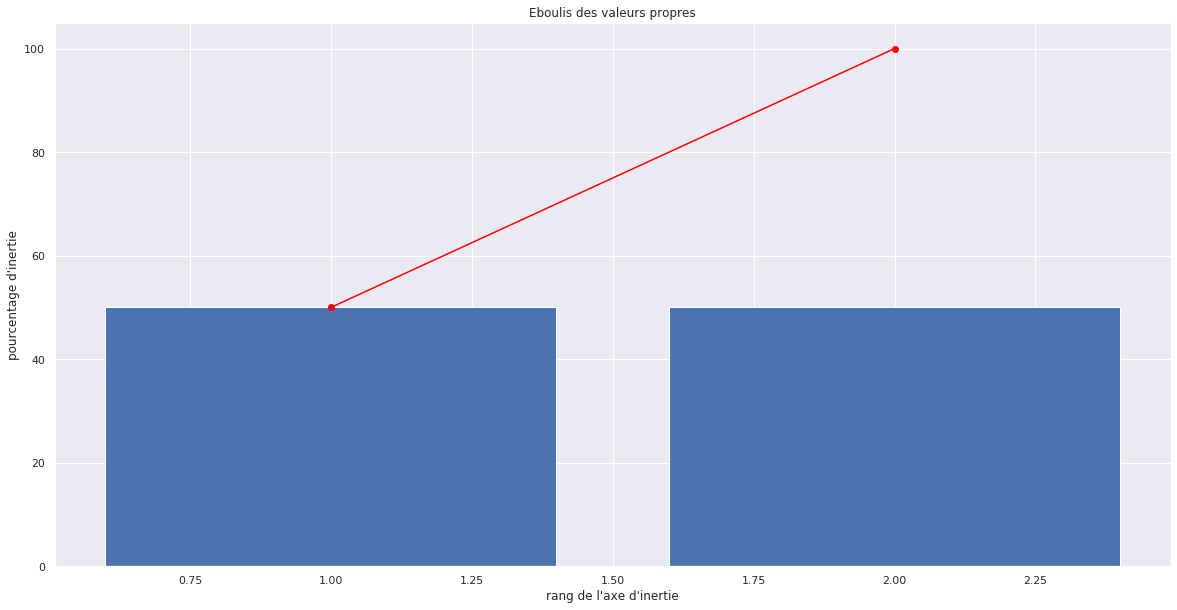

In [57]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[["Difference de population","Disponibilité alimentaire Kcal"]]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [58]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

Explained Variance: [0.81932779 0.18067221]


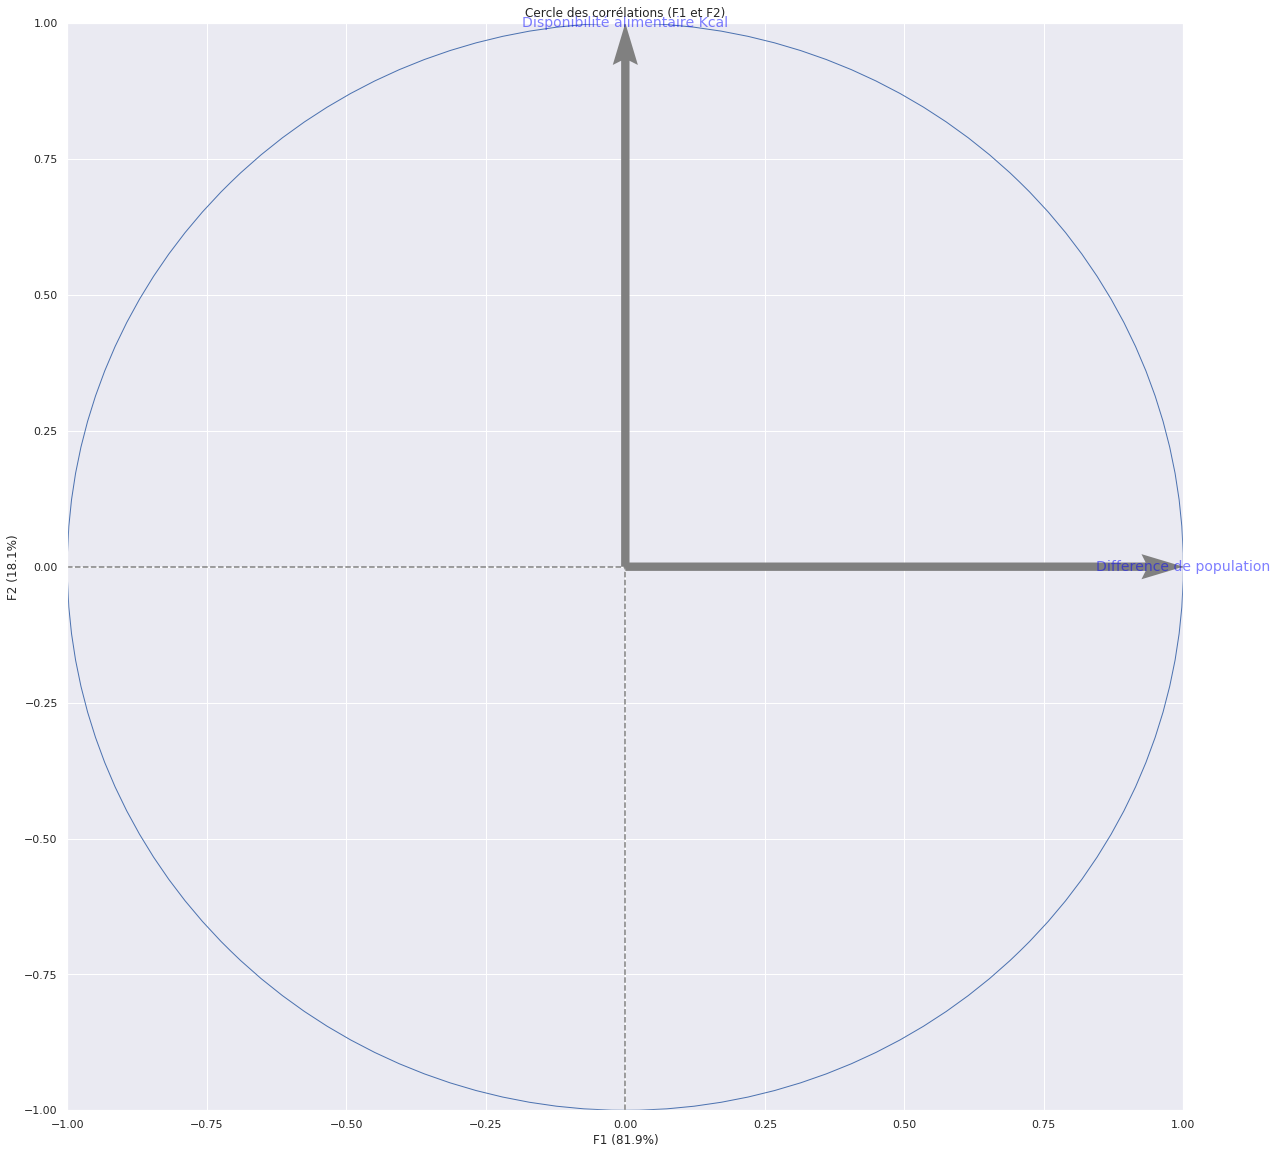

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

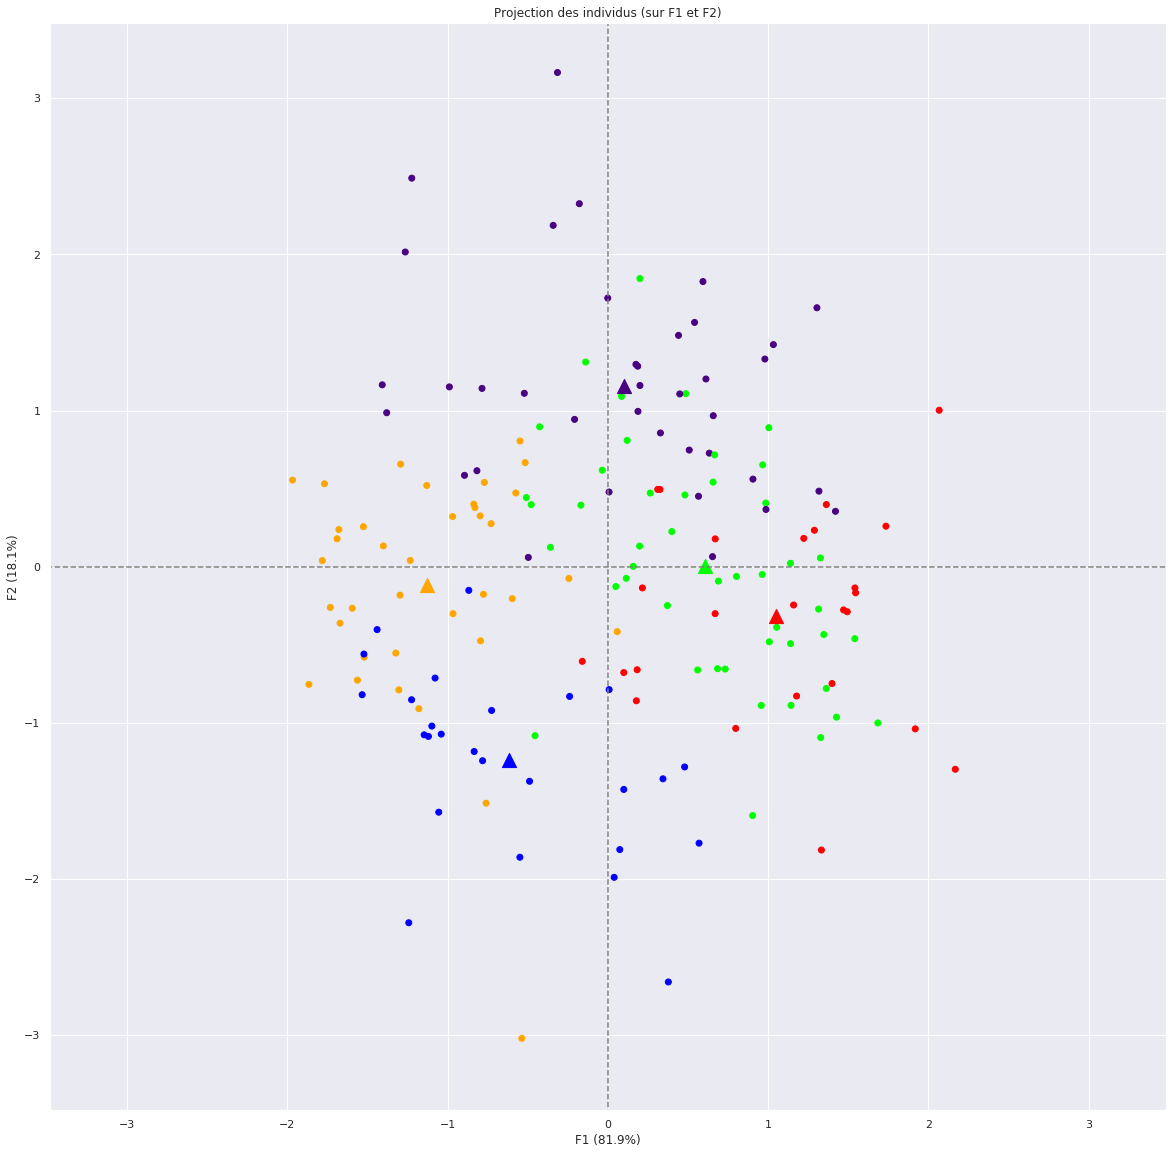

In [59]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], df['Clusters'])#, labels = np.array(names))

In [60]:
covariance_matrix = np.cov(df.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 2.86992434e+00 -4.92133949e-16 -2.31134150e-16  1.50626750e-16
   1.06275282e+00]
 [-4.92133949e-16  6.32854865e-01 -1.14268569e-16  1.64423381e-16
   6.89650334e-01]
 [-2.31134150e-16 -1.14268569e-16  4.20625877e-01 -1.55820775e-17
   2.36105955e-02]
 [ 1.50626750e-16  1.64423381e-16 -1.55820775e-17  9.99867349e-02
   1.04906494e-01]
 [ 1.06275282e+00  6.89650334e-01  2.36105955e-02  1.04906494e-01
   1.85475316e+00]]


In [61]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

Eigenvectors:
 [[-0.82104219  0.53563969 -0.07392594  0.18288444  0.00825166]
 [-0.12962969 -0.51046468 -0.2415617   0.81267217  0.061918  ]
 [-0.0041407  -0.01415993 -0.01340002  0.06248872 -0.99784666]
 [-0.01670727 -0.04889733 -0.94778677 -0.31462926 -0.00621224]
 [-0.5556884  -0.6707641   0.19417412 -0.45080018 -0.01901389]] 

Eigenvalues:
 [3.58920456 1.53907366 0.07849443 0.25029655 0.42107578]


In [62]:
eigen_vec_svd, _, _= np.linalg.svd(df.T)
eigen_vec_svd

array([[-1.21852675e-01,  9.92050528e-01, -3.11405663e-02,
         1.24233819e-03,  4.04930039e-03],
       [-6.28090407e-02, -3.90818919e-02, -9.97123445e-01,
         9.30137580e-03,  1.36363658e-02],
       [-2.10914839e-03, -1.21566192e-03,  9.51885482e-03,
         9.99951431e-01,  7.74789780e-04],
       [-9.10798180e-03, -4.74587042e-03,  1.44245406e-02,
        -9.36998040e-04,  9.99842776e-01],
       [-9.90514789e-01, -1.19517170e-01,  6.69060917e-02,
        -2.86326317e-03, -1.05582362e-02]])

In [63]:
for val in eigen_values:
    print(val)

3.589204562066265
1.539073660831687
0.07849442568046149
0.2502965508295628
0.4210757754322298


In [64]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[61.060157199743706,
 26.182982342546353,
 1.335360492407646,
 4.258087405140377,
 7.163412560161915]

In [65]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 61.0601572 ,  87.24313954,  88.57850003,  92.83658744,
       100.        ])

ValueError: arrays must all be same length

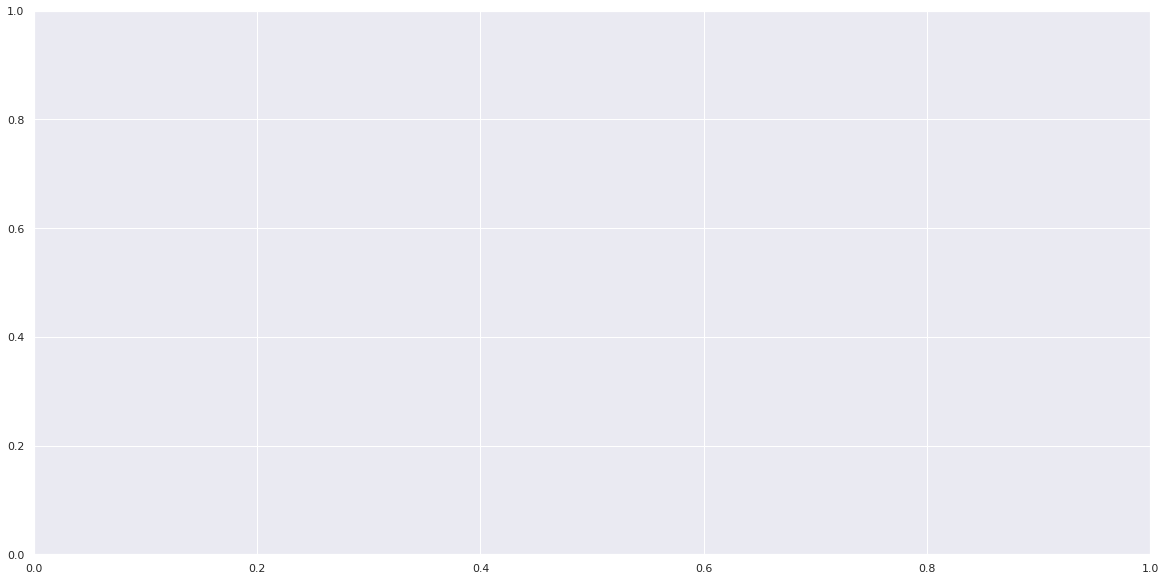

In [66]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
sns.lineplot(x = [1,2,3], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [ ]:
projection_matrix = (eigen_vectors.T[:][:])[:2, :2].T
print("Projection matrix: \n", projection_matrix)

In [ ]:
X_pca = X.dot(projection_matrix)

In [ ]:
for clu in clusters:
    sns.scatterplot(X_pca[df['Clusters']==clusters, 0],
                   X_pca[df['Clusters']==clusters, 1])

In [ ]:
corrmat = np.abs(df[df['Clusters'] == 5].iloc[:,:2].corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
df.iloc[:,2]

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 50))

In [ ]:
df

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

df['clusters'] = fcluster(Z, 2, criterion='maxclust')
clusters = df.pop('clusters')

lut = dict(zip(clusters.unique(), "rbgym"))
row_colors = clusters.map(lut)

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 40), row_colors=row_colors)

In [ ]:
lut

### Découpage en 2 clusters

In [ ]:
Z

In [ ]:
clusters = fcluster(Z, 2, criterion='maxclust')

In [ ]:
clusters

In [ ]:
data['Clusters'] = clusters

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot((data['Difference de population'] - data['Difference de population'].mean()) / data.std()['Difference de population'], norm_hist = True, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot((data['Disponibilité alimentaire Kcal'] - data['Disponibilité alimentaire Kcal'].mean()) / data.std()['Disponibilité alimentaire Kcal'], norm_hist = True, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data['Disponibilité alimentaire Protéine'], norm_hist = True, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data['Proportion Protéine Animale'], norm_hist = True, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Total", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data.std()['Difference de population']

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

std = data.std()['Difference de population']
mean = data['Difference de population'].mean()

ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Difference de population'] - mean) / std, ax=axes[0, 0]))
ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Difference de population'] - mean) / std, ax=axes[0, 0]))

std = data.std()['Disponibilité alimentaire Kcal']
mean = data['Disponibilité alimentaire Kcal'].mean()

ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))
ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))

std = data.std()['Disponibilité alimentaire Protéine']
mean = data['Disponibilité alimentaire Protéine'].mean()

ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))
ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))

std = data.std()['Proportion Protéine Animale']
mean = data['Proportion Protéine Animale'].mean()

ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 1", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

fig.suptitle('Répartition du prix en fonction de la catégorie du livre', fontsize= _FONTSIZETITLE_)
ax1 = sns.boxplot(x='Clusters', y='Difference de population', meanprops=meanprops, showmeans=True, data=data)

plt.xlabel("Clusters")
plt.ylabel("Difference de population")

sns.despine(left=True, bottom=True)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Difference de population'], ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'], ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'], ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Proportion Protéine Animale'], ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 2", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data

### ACP

In [ ]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]]

# préparation des données pour l'ACP
X = data_pca.values
names = data.index #pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [ ]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

In [ ]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], clusters)#, labels = np.array(names))

In [ ]:
corrmat = np.abs(data.corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
sns.pairplot(data, hue='Clusters')

In [ ]:
pcs

In [ ]:
X_projected = np.hstack((X_projected, np.atleast_2d(clusters).T))

In [ ]:
clusters

In [ ]:
meanD1 = []
meanD2 = []

In [ ]:
meanD1.append(X_projected[X_projected[ : , -1] == 2][:, 0].mean())

In [ ]:
meanD1

In [ ]:
for i in range(1,int(data.max().clusters)+1):
    meanD1.append(X_projected[X_projected[ : , -1] == i][:, 0].mean())
    meanD2.append(X_projected[X_projected[ : , -1] == i][:, 1].mean())

In [ ]:
X_projected[X_projected[ : , -1] == i][:, 0].mean()

In [ ]:
meanD1